# <h1 align=center> **PROYECTO INDIVIDUAL Nº1** </h1>


In [ ]:
from google.colab import drive
drive.mount('/drive/')

Mounted at /drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.- INGESTA DE DATOS

En primer Lugar se debe importar las librerías con la que se va a proceder a leer los archivos JSON y se ocuparan a lo largo del trabajo.

In [1]:
import json
import pandas as pd
import gzip
import ast
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from ast import literal_eval

Luego se genera una función para abrir cada uno de los archivos

In [2]:
def abrir_comprimido(archivo):
    data_list = []
    with gzip.open(archivo, 'rb') as file:
        for line in file:
            decode_line = line.decode('utf-8')
            data_list.append(ast.literal_eval(decode_line.strip()))
        return data_list


- Archivo 'user_reviews.json.gz'

In [ ]:
archivo = '/content/drive/MyDrive/Colab Notebooks/user_reviews.json.gz'
data = abrir_comprimido(archivo)
df_reviews = pd.DataFrame(data)

In [3]:
archivo = 'user_reviews.json.gz'
data = abrir_comprimido(archivo)
df_reviews = pd.DataFrame(data)

In [4]:
display(df_reviews)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [5]:
info_general = df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


- Archivo 'users_items.json.gz'

In [ ]:
archivo = '/content/drive/MyDrive/Colab Notebooks/users_items.json.gz'
data = abrir_comprimido(archivo)
df_items = pd.DataFrame(data)

In [6]:
archivo = 'users_items.json.gz'
data = abrir_comprimido(archivo)
df_items = pd.DataFrame(data)

In [7]:
display(df_items)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [8]:
info_general = df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


- Archivo 'steam_games.json.gz'

In [9]:
archivo = 'steam_games.json.gz'
data = abrir_comprimido(archivo)
df_games = pd.DataFrame(data)

ValueError: malformed node or string on line 1: <ast.Name object at 0x000001C525DA64A0>

En razon del error precedente, que surge por usar ast.literal_eval para convertir líneas del archivo en objetos de Python, lo que no es adecuado para el formato de datos que tienes en el archivo, me veo en la situación de retocar la funcion "abrir_comprimido" por la siguiente:

In [10]:
def abrir_comprimido(archivo):
    data_list = []
    with gzip.open(archivo, 'rt', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line.strip())
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error en línea: {line.strip()}")
                print(e)
    return data_list

Vuelvo a instanciar la función y visuallizar su contenido y datos como con las anteriores

In [ ]:
archivo = '/content/drive/MyDrive/Colab Notebooks/steam_games.json.gz'
data = abrir_comprimido(archivo)
df_games = pd.DataFrame(data)

In [11]:
archivo = 'steam_games.json.gz'
data = abrir_comprimido(archivo)
df_games = pd.DataFrame(data)

In [12]:
display(df_games)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76561197970982479,76561197970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,js41637,76561198035864385,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,evcentric,76561198007712555,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Riot-Punch,76561197963445855,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doctr,76561198002099482,"[{'item_id': '300', 'item_name': 'Day of Defea...",541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS""",NaN,NaN,NaN,NaN
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada,NaN,NaN,NaN,NaN
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,NaN,NaN,NaN,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",NaN,NaN,NaN,NaN


In [13]:
info_general = df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  object 
 12  id              32133 non-null  object 
 13  metascore       2677 non-null   object 
 14  developer       28836 non-null  object 
 15  user_id         88310 non-null  object 
 16  steam_id        88310 non-null  object 
 17  items           88310 non-nul

# 2.- ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Para iniciar el análisis exploratorio hay que entender cual es la relación entre las tres tabla, comprendiendo que en el data frame "items" se encontrarían todas las claves o llaves a partir de las cuales se pueden establecer conexiones con las demás tablas. Por otro lado, la tabla "games" contiene todos los productos que integran el negocio y, por su parte, en la tabla "reviews" se han volcado datos a cerca de la experiencia que han tenido los usuarios en la utilización de esos productos.

A partir de esa premisa se pueden extraer los siguientes...

- Hallazgos preliminares

De una contrastación inicial de los tres dataframe se observan los siguientes hallazgos:

A.- Los tres tienen en comun una columna "user_id", pero "reviews" posee 25799 líneas de datos a diferencia de "items", cuya longitud es de 88310 lineas de datos, conincidiendo dicho parámetro con la cantidad de datos no nulos visualizados en "games" respectos de las columnas que coniciden con aquella tabla.

Eso sí, esta columna "user_id" se encuentra completa, sin datos nulos, en los tres dataframe; por lo que unas de las tareas a develar es ver si la diferencia de rows se debe a datos repetidos, para lo que sería útil detectar algún otro  campo que permita explicar dicha repetición. Sin perjuicio de ello, la diferencia cuantitativa puede deberse a que no todos los usuarios hayan dejado una reseña.

B.- Los dataframe "items" y "games" a su vez comparten la columna "steam_id", columna en comun que en ambos se encuentran sin datos nulos con 88310 entradas en cada dataframe.

C.- Asimismo, las tres tablas poseen columnas anidadas en formato de lista de diccionarios, a saber: la tabla "reviews", la columna "reviews"; y las tablas "items" y "games", la columna "items". Asimismo estas tres columnas anidadas comparten una clave-valor en común llamada "item_id".

Antes de pasar a las soluciones propuestas para estos hallazgos, es pertinente que mediante la función "discribe()" observemos que otra información nos pueden brindar.


In [14]:
df_games.describe()

,discount_price,items_count
count,225.000000,88310.000000
mean,11.930533,58.353629
std,17.492643,122.312095
min,0.490000,0.000000
25%,1.390000,3.000000
50%,4.190000,26.000000
75%,22.660000,73.000000
max,139.990000,7762.000000


In [15]:
df_items.describe()

,items_count
count,88310.000000
mean,58.353629
std,122.312095
min,0.000000
25%,3.000000
50%,26.000000
75%,73.000000
max,7762.000000


In [16]:
df_reviews.describe()

,user_id,user_url,reviews
count,25799,25799,25799
unique,25485,25485,25459
top,76561198027488037,http://steamcommunity.com/profiles/76561198027...,[]
freq,3,3,28


La ejecución de ésta función sobre los data frame "games" e "items", a través de la columna "items_count" corrobora en cierta forma la apreciación efectuada en "B.-", pudiendo sostenerse que ambas tablas comparten columnas de datos, con la misma cantidad de entradas (user-id), pudiendo llegar a prescindirse de alguna de ellas, de ser apropiado.

D.- Por otra parte, esta función ejecutada sobre el data frame "reviews" arroja lo sigueinte:

-El número de registros no nulos en las tres columnas es de 25.799.

-La cantidad de valores únicos en las columna user_id y user_url es de 25485, lo que significa que algunos usuarios han realizado múltiples reseñas. Por su parte en la columna review hay 25.459 valores únicos, lo que significa que algunas reseñas son idénticas.

-El valor más común en la columna user_id es el usuario con el ID "76561198027488037", con una frecuencia de tres veces; en la columna user_url es la URL "http://steamcommunity.com/profiles/76561198027...", con una frecuencia de 3 veces ; y en la columna reviews es una lista vacía "[]", con una frecuencia de 28 veces.


- Soluciones a los hallazgos preliminares

A.- En primer lugar me da curiosidad saber cúal es la lógica que sige la columna "steam_id" en los dataframes, por ello primero decido ver si los mismos son números correlativos, para ello procedo a ordenarlos de modo ascendente e imprimo la cabeza y la cola del dataset para extraer alguna conclusión

In [17]:
df_items_ordenado = df_items.sort_values(by='steam_id', ascending=True)
display(df_items_ordenado)

,user_id,items_count,steam_id,user_url,items
3553,ONIONZZZ,384,76561197960269200,http://steamcommunity.com/id/ONIONZZZ,"[{'item_id': '300', 'item_name': 'Day of Defea..."
3684,exaqt,209,76561197960270504,http://steamcommunity.com/id/exaqt,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
5090,dvs,36,76561197960270742,http://steamcommunity.com/id/dvs,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
42895,76561197960271609,30,76561197960271609,http://steamcommunity.com/profiles/76561197960...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
25747,thefourdigit,123,76561197960271888,http://steamcommunity.com/id/thefourdigit,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
...,...,...,...,...,...
22765,76561198328629223,1,76561198328629223,http://steamcommunity.com/profiles/76561198328...,"[{'item_id': '227940', 'item_name': 'Heroes & ..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
29797,Jazzi3,6,76561198328946162,http://steamcommunity.com/id/Jazzi3,"[{'item_id': '248570', 'item_name': 'Toribash'..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [18]:
df_games_ordenado = df_games.sort_values(by='steam_id', ascending=True)

display(df_games_ordenado)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
3553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONIONZZZ,76561197960269200,"[{'item_id': '300', 'item_name': 'Day of Defea...",384.0
3684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exaqt,76561197960270504,"[{'item_id': '10', 'item_name': 'Counter-Strik...",209.0
5090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dvs,76561197960270742,"[{'item_id': '10', 'item_name': 'Counter-Strik...",36.0
42895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76561197960271609,76561197960271609,"[{'item_id': '10', 'item_name': 'Counter-Strik...",30.0
25747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,thefourdigit,76561197960271888,"[{'item_id': '10', 'item_name': 'Counter-Strik...",123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS""",NaN,NaN,NaN,NaN
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada,NaN,NaN,NaN,NaN
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,NaN,NaN,NaN,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",NaN,NaN,NaN,NaN


De ésta ejecución se puede decir que no son números correlativos, que tanto la cabeza y la cola de ambos dataframe coniciden, por lo que infiero que las demás filas, al ser identico el número de líneas, también lo harían; orservandose por otro lado que las columnas items son idénticas


Para terminar de confirmar la similitud de ambas columnas items, valiendome del método loc() ingresaré al azar dentro de la misma fila de cada data frame y comprobaremos si la sospecha se confirma.

In [19]:
df_games_ordenado.loc[25748, 'items']

[{'item_id': '43110',
  'item_name': 'Metro 2033',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '42910',
  'item_name': 'Magicka',
  'playtime_forever': 1078,
  'playtime_2weeks': 0},
 {'item_id': '105600',
  'item_name': 'Terraria',
  'playtime_forever': 8786,
  'playtime_2weeks': 0},
 {'item_id': '205790',
  'item_name': 'Dota 2 Test',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '109600',
  'item_name': 'Neverwinter',
  'playtime_forever': 639,
  'playtime_2weeks': 0},
 {'item_id': '200210',
  'item_name': 'Realm of the Mad God',
  'playtime_forever': 1153,
  'playtime_2weeks': 0},
 {'item_id': '212800',
  'item_name': 'Super Crate Box',
  'playtime_forever': 12,
  'playtime_2weeks': 0},
 {'item_id': '218130',
  'item_name': 'Dungeonland',
  'playtime_forever': 35,
  'playtime_2weeks': 0},
 {'item_id': '231060',
  'item_name': 'Ragnarok Online 2',
  'playtime_forever': 2406,
  'playtime_2weeks': 0},
 {'item_id': '238960',
  'item_name': 'Path of E

In [20]:
df_items_ordenado.loc[25748, 'items']

[{'item_id': '43110',
  'item_name': 'Metro 2033',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '42910',
  'item_name': 'Magicka',
  'playtime_forever': 1078,
  'playtime_2weeks': 0},
 {'item_id': '105600',
  'item_name': 'Terraria',
  'playtime_forever': 8786,
  'playtime_2weeks': 0},
 {'item_id': '205790',
  'item_name': 'Dota 2 Test',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '109600',
  'item_name': 'Neverwinter',
  'playtime_forever': 639,
  'playtime_2weeks': 0},
 {'item_id': '200210',
  'item_name': 'Realm of the Mad God',
  'playtime_forever': 1153,
  'playtime_2weeks': 0},
 {'item_id': '212800',
  'item_name': 'Super Crate Box',
  'playtime_forever': 12,
  'playtime_2weeks': 0},
 {'item_id': '218130',
  'item_name': 'Dungeonland',
  'playtime_forever': 35,
  'playtime_2weeks': 0},
 {'item_id': '231060',
  'item_name': 'Ragnarok Online 2',
  'playtime_forever': 2406,
  'playtime_2weeks': 0},
 {'item_id': '238960',
  'item_name': 'Path of E

En fin, lo sospechado se confirma, es decir que existe una alta similitud en la columna "items" de los data frame "df_games" y "df_items", por lo que si de acá en más tengo que optar por trabajar con una de las dos columnas, me quedaré con la del data frame "df_games" ya que de ella surgirá la mayor cantidad de datos a utilizar para las funciones.

B- Asimismo, a los fines de hallar alguna solución a estos hallazgos y teniendo presente la diferencia de filas entre el data frame "games" e "items", también se me ocurre, como medida posible de arrojar buenos resultados, la opción de indagar sobre datos duplicados en las columnas que considero claves en las tablas, como son "user_id" e "items", haciendo una iteración por la primer columna y una segunda contrastación en tanto esa repetición también se refleje en "items", y los resultados son los siguientes:

- df_items

In [21]:
def contar_valores_repetidos1(df):
    df_copia = df.copy()
    df_copia['user_id_items'] = df_copia.apply(lambda row: (row['user_id'], str(row['items'])), axis=1)
    duplicados_user_id = df_copia['user_id'].duplicated(keep=False).sum()
    duplicados_user_id_items = df_copia['user_id_items'].duplicated(keep=False).sum()

    return duplicados_user_id, duplicados_user_id_items

In [22]:
duplicados_user_id, duplicados_user_id_items, = contar_valores_repetidos1(df_items)

print(f'Cantidad de duplicados en "user_id": {duplicados_user_id}')
print(f'Cantidad de duplicados en "user_id_items" (considerando "items"): {duplicados_user_id_items}')

Cantidad de duplicados en "user_id": 1357
Cantidad de duplicados en "user_id_items" (considerando "items"): 1305


- df_games

In [24]:
duplicados_user_id, duplicados_user_id_items = contar_valores_repetidos1(df_games)

print(f'Cantidad de duplicados en "user_id": {duplicados_user_id}')
print(f'Cantidad de duplicados en "user_id_items" (considerando "items"): {duplicados_user_id_items}')

Cantidad de duplicados en "user_id": 33492
Cantidad de duplicados en "user_id_items" (considerando "items"): 33440


- df_reviews

In [25]:
df_reviews.columns

Index(['user_id', 'user_url', 'reviews'], dtype='object')

Se debe modificar levemente la función porque las columnas no son las mismas.

In [27]:
def contar_valores_repetidos2(df):
    df_copia = df.copy()
    df_copia['user_id_items'] = df_copia.apply(lambda row: (row['user_id'], str(row['reviews'])), axis=1)
    duplicados_user_id = df_copia['user_id'].duplicated(keep=False).sum()
    duplicados_user_id_reviews = df_copia['user_id_items'].duplicated(keep=False).sum()

    return duplicados_user_id, duplicados_user_id_reviews

In [28]:
duplicados_user_id, duplicados_user_id_revies = contar_valores_repetidos2(df_reviews)

print(f'Cantidad de duplicados en "user_id": {duplicados_user_id}')
print(f'Cantidad de duplicados en "user_id_reviews" (considerando "items"): {duplicados_user_id_revies}')

Cantidad de duplicados en "user_id": 623
Cantidad de duplicados en "user_id_reviews" (considerando "items"): 621


A su vez, se me ocurre indagar dentro del data frame "games" cuantas filas contienen datos vacios, filtrando el mismo por la columan "user_id", y el resultado es el siguiente:

In [29]:
df_filas_sin_user_id = df_games[df_games['user_id'].isnull() | df_games['user_id'].eq('')]
df_filas_sin_user_id

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,False,761140,NaN,Kotoshiro,NaN,NaN,NaN,NaN
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,NaN,Secret Level SRL,NaN,NaN,NaN,NaN
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,NaN,Poolians.com,NaN,NaN,NaN,NaN
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,0.83,[Single-player],0.99,False,767400,NaN,彼岸领域,NaN,NaN,NaN,NaN
88314,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,1.79,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,1.49,"[Single-player, Steam Achievements]",1.99,False,773640,NaN,"Nikita ""Ghost_RUS""",NaN,NaN,NaN,NaN
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,4.24,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,NaN,Sacada,NaN,NaN,NaN,NaN
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,1.39,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,NaN,Laush Dmitriy Sergeevich,NaN,NaN,NaN,NaN
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,NaN,"xropi,stev3ns",NaN,NaN,NaN,NaN


Por lo tanto, de la tarea que acabo de ejecutar concluyo que la diferencias de filas entre las tablas "items" y "games" es el resultado de la sumatoria entre filas con datos nulos en la columna "user_id" del dataframe "df_games" con las filas repetidas obtenidas a raiz de la función "contar_valores_repetidos" a partir del data frame "df_items" que en la tabla "games" son contados también como duplicados. En números, la sumatoria sería así:

88310 datos no nul en "user_id" df_games

32135 lineas nan user_id df_games

1305 lineas repetidas en "user_id" e "items" del df_items
    
120445 lineas df_games  

En razon de ello, como medidas ETL propongo borrar los datos duplicados de la tabla "df_items".

 Ahora, en relación al "df_games" sería más cuidadosa con la eliminación de los duplicados, porque en primer lugar representan un tercio de la tabla, además si bien al ejecutar el método drop_duplicate borraríamos las lineas donde no exista "user_id" o este se repita al igual que en "items" y lograriamos equiparar ambos datas sets en su longitud, no sería una medida asertada que se ajuste a la distribución de los datos que posee esa tabla, porque como puede observarse al ejecutar el metodo display() existen lineas en donde en esas colummnas no tengo datos pero si tengo información en relación al género de los juegos o el desarrollador, y viceversa, siendo esta otra información también importante para generar las funciones que me encargaron ejecutar.

 Por ello, en vista de un ETL, respecto de ésta tabla adopto las siguientes pautas de trabajo:

 1.intentaría completar los valores faltantes tomando como parámetro alguna otra columna que se relacione.

 2.al manipular las columnas siempre tendría la precaución de no contemplar los valores nulos, vacios o repetidos.

 En cuanto, a los valores duplicados del data frame "df_reviews" podría optarse eliminarlos, sin mayores reparos.

# 3.- EXTRACCIÓN, TRANSFORMACIÓN Y CARGA DE DATOS (ETL)

A.- Splitear las columnas anidadas, iniciando por la tabla "items_SD" ya que en ella detecto, además de la clave "item_id", la clave "item_name" que también se encuentra presente en la columna anidada de la tabla "games", y en base a la identidad de parámetros mencionados hasta acá puede aportar mayor pista de la relación entre ambas.

Esa tarea se realizara bajo los siguientes criterios:

-Se creará una función split ("extraer_values") tomando como parámetros las claves que integran los diccionarios contenidos en las listas dentro de las columanas "items".

-Como por cada fila puede existir más de un diccionario, para no perder la trazabilidad y relación de la información, se mantendrá el "user_id" del dataframe df_items.

-El nuevo dataframe se llamara "df_items_split"

In [30]:
def extraer_values(df, columna, claves, nuevas_columnas):
    extracted_rows = []
    for index, row in df.iterrows():
        columnai = row[columna]
        user_id = row['user_id']
        if isinstance(columnai, list):
            for item in columnai:
                extracted_row = {'user_id': user_id}
                for key, name in zip(claves, nuevas_columnas):
                    extracted_value = item.get(key, '')
                    extracted_row[name] = extracted_value
                extracted_rows.append(extracted_row)

    df_new = pd.DataFrame(extracted_rows)

    return df_new

In [31]:
df = df_items
df_items = pd.DataFrame(df_items)
claves = ['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks']
nuevas_columnas = ['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks', 'user_id']
columna = 'items'
df_items_split = extraer_values(df, columna, claves, nuevas_columnas)

In [32]:
df_items_split

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,4


Seguidamente, me parece una buena práctica ordenar el mismo a través de la columna item_id, de modo ascendente para ver si existen repetidos en ese valor, como también ver su información general.

In [33]:
df_items_split_ordenado = df_items_split.sort_values(by='item_id', ascending=True)

display(df_items_split_ordenado)

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
4735355,Gutzen,10,Counter-Strike,18,0
3242613,76561198092430936,10,Counter-Strike,1,0
3242367,henryle,10,Counter-Strike,5959,93
3242223,DeadPowerGamer,10,Counter-Strike,0,0
...,...,...,...,...,...
3255152,RaiseEm,99920,Spiral Knights Preview,0,0
1984031,sakurayuki,99920,Spiral Knights Preview,0,0
713853,PSLOVER9,99920,Spiral Knights Preview,0,0
558457,heavykiinthesandvichborn,99920,Spiral Knights Preview,0,0


In [34]:
df_items_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   item_name         object
 3   playtime_forever  int64 
 4   playtime_2weeks   int64 
dtypes: int64(2), object(3)
memory usage: 196.6+ MB


In [35]:
df_items_split.describe()

,playtime_forever,playtime_2weeks
count,5.153209e+06,5.153209e+06
mean,9.914951e+02,9.104707e+00
std,5.418204e+03,1.403926e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.400000e+01,0.000000e+00
75%,3.550000e+02,0.000000e+00
max,6.427730e+05,1.996700e+04


Como el método anterior no me muestra los valores nulos ni vacios por columnas, formularé metodos especificos para extraer los valores nulos, repetidos y únicos.

In [36]:
df_items_split_ordenado.isnull().sum()

user_id             0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [37]:
df_items_split_ordenado.duplicated().sum()

59104

In [38]:
df_items_split_ordenado.nunique().sum()

146148

Como puede observarse, existen valores repetidos en la columna analizada. Igualmente en su comparación con la columna "user_id" se puede inferir que la repetición de entradas se debe a que varios jugadores estan vinculados al mismo juego, diferenciandose en las columnas "playtime_forever" y "playtime_2weeks".

El mismo procedimiento realizado con la tabla "items" realizaré con las tablas "games" y "reviews", bajo los siguientes criterios:

-El data frame "df_games" se llamará "df_games_split"

-El data frame "df_reviewss" se llamará "df_reviews_split"

In [39]:
df = df_games
df_games = pd.DataFrame(df_games)
claves = ['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks']
nuevas_columnas = ['item_id', 'item_name', 'playtime_forever', 'playtime_2weeks', 'user_id']
columna = 'items'
df_games_split = extraer_values(df, columna, claves, nuevas_columnas)


display(df_games_split)


,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [40]:
df_games_split_ordenado = df_games_split.sort_values(by='item_id', ascending=True)

display(df_games_split_ordenado)

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
4735355,Gutzen,10,Counter-Strike,18,0
3242613,76561198092430936,10,Counter-Strike,1,0
3242367,henryle,10,Counter-Strike,5959,93
3242223,DeadPowerGamer,10,Counter-Strike,0,0
...,...,...,...,...,...
3255152,RaiseEm,99920,Spiral Knights Preview,0,0
1984031,sakurayuki,99920,Spiral Knights Preview,0,0
713853,PSLOVER9,99920,Spiral Knights Preview,0,0
558457,heavykiinthesandvichborn,99920,Spiral Knights Preview,0,0


In [41]:
df_games_split_ordenado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5153209 entries, 0 to 2833542
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   item_name         object
 3   playtime_forever  int64 
 4   playtime_2weeks   int64 
dtypes: int64(2), object(3)
memory usage: 235.9+ MB


In [42]:
print(df_games_split_ordenado.isnull().sum())


user_id             0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64


In [43]:
print(df_games_split_ordenado.isna().sum())

user_id             0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64


- df_reviews

In [44]:
df = df_reviews
df_reviews = pd.DataFrame(df_reviews)
claves = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']
nuevas_columnas = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 'user_id']
columna = 'reviews'
df_reviews_split = extraer_values(df, columna, claves, nuevas_columnas)


display(df_reviews_split)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


Visualizar valores duplicados en 'user_id' en tanto se repitan en 'posted',	'item_id',	'review'

In [45]:
df_reviews_split['unique_id'] = df_reviews_split['user_id'].astype(str) + '_'+ df_reviews_split['posted'].astype(str) + df_reviews_split['item_id'].astype(str)+ df_reviews_split['review'].astype(str)

df_reviews_split_unique = df_reviews_split.loc[~df_reviews_split['unique_id'].duplicated()]
df_reviews_split_unique

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250..."
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It..."
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G..."
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what..."
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s..."
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244_Posted July 10.70a must have...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244_Posted July 8.362890this gam...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley_Posted July 3.273110had so much fu...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley_Posted July 20.730:D


Borrar duplicados

In [46]:
df_reviews_split_unique = df_reviews_split.drop_duplicates('unique_id')
df_reviews_split_unique

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250..."
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It..."
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G..."
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what..."
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s..."
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244_Posted July 10.70a must have...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244_Posted July 8.362890this gam...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley_Posted July 3.273110had so much fu...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley_Posted July 20.730:D


In [47]:
df_reviews_split_unique_ordenado = df_reviews_split_unique.sort_values(by='item_id', ascending=True)
display(df_reviews_split_unique_ordenado)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
53604,Tokiwadai,1 person found this review funny,"Posted March 28, 2015.",,10,0 of 1 people (0%) found this review helpful,True,A good fps but i would get Source or GO first,"Tokiwadai_Posted March 28, 2015.10A good fps b..."
1003,Bennysaputra,,"Posted August 1, 2015.",,10,No ratings yet,True,Cool game,"Bennysaputra_Posted August 1, 2015.10Cool game"
33785,76561198082737449,,"Posted October 18, 2014.",,10,No ratings yet,True,realmente,"76561198082737449_Posted October 18, 2014.10re..."
56080,76561198089673598,,"Posted December 14, 2014.",,10,No ratings yet,True,o cs e um otimo jogo de fps ele quase sempre,"76561198089673598_Posted December 14, 2014.10o..."
49330,76561198056101934,,"Posted May 18, 2014.",,10,2 of 2 people (100%) found this review helpful,True,Esse jogo é muito bom recomendo e ganha do cs ...,"76561198056101934_Posted May 18, 2014.10Esse j..."
...,...,...,...,...,...,...,...,...,...
48046,76561198046474248,,"Posted October 6, 2014.",,99900,2 of 5 people (40%) found this review helpful,False,♥♥♥♥ game,"76561198046474248_Posted October 6, 2014.99900..."
32632,Jezza453,,"Posted March 4, 2015.",,99910,No ratings yet,True,"This is a highly strategic puzzle game, it has...","Jezza453_Posted March 4, 2015.99910This is a h..."
53052,Themfgamer,,"Posted July 25, 2014.",,99910,0 of 9 people (0%) found this review helpful,False,"1/10, just a bad game overall. Dead, Boring, d...","Themfgamer_Posted July 25, 2014.999101/10, jus..."
8972,WhenWeWereYoungggg,,"Posted June 4, 2012.",,99910,1 of 2 people (50%) found this review helpful,True,Super fun.,"WhenWeWereYoungggg_Posted June 4, 2012.99910Su..."


In [48]:
print(df_reviews_split_unique_ordenado.isnull().sum())

user_id        0
funny          0
posted         0
last_edited    0
item_id        0
helpful        0
recommend      0
review         0
unique_id      0
dtype: int64


In [49]:
print(df_reviews_split_unique_ordenado.isna().sum())

user_id        0
funny          0
posted         0
last_edited    0
item_id        0
helpful        0
recommend      0
review         0
unique_id      0
dtype: int64


Finalizada esta tarea, puede observarse que los data frame spliteados "items" y "games" coiciden entre si, en longitud e inicio y fin de los mismos; situación que no se repite con el data frame spliteado "reviews" ya que éste solo contiene 59305 filas y los otros 5153209. Igualmente los tres data frame spliteados tienen en comun que ninguna de las columnas esta vacía.

Visualizo la distribución de los datos, dentro de las columnas, del data frame df_reviews_split_unique.

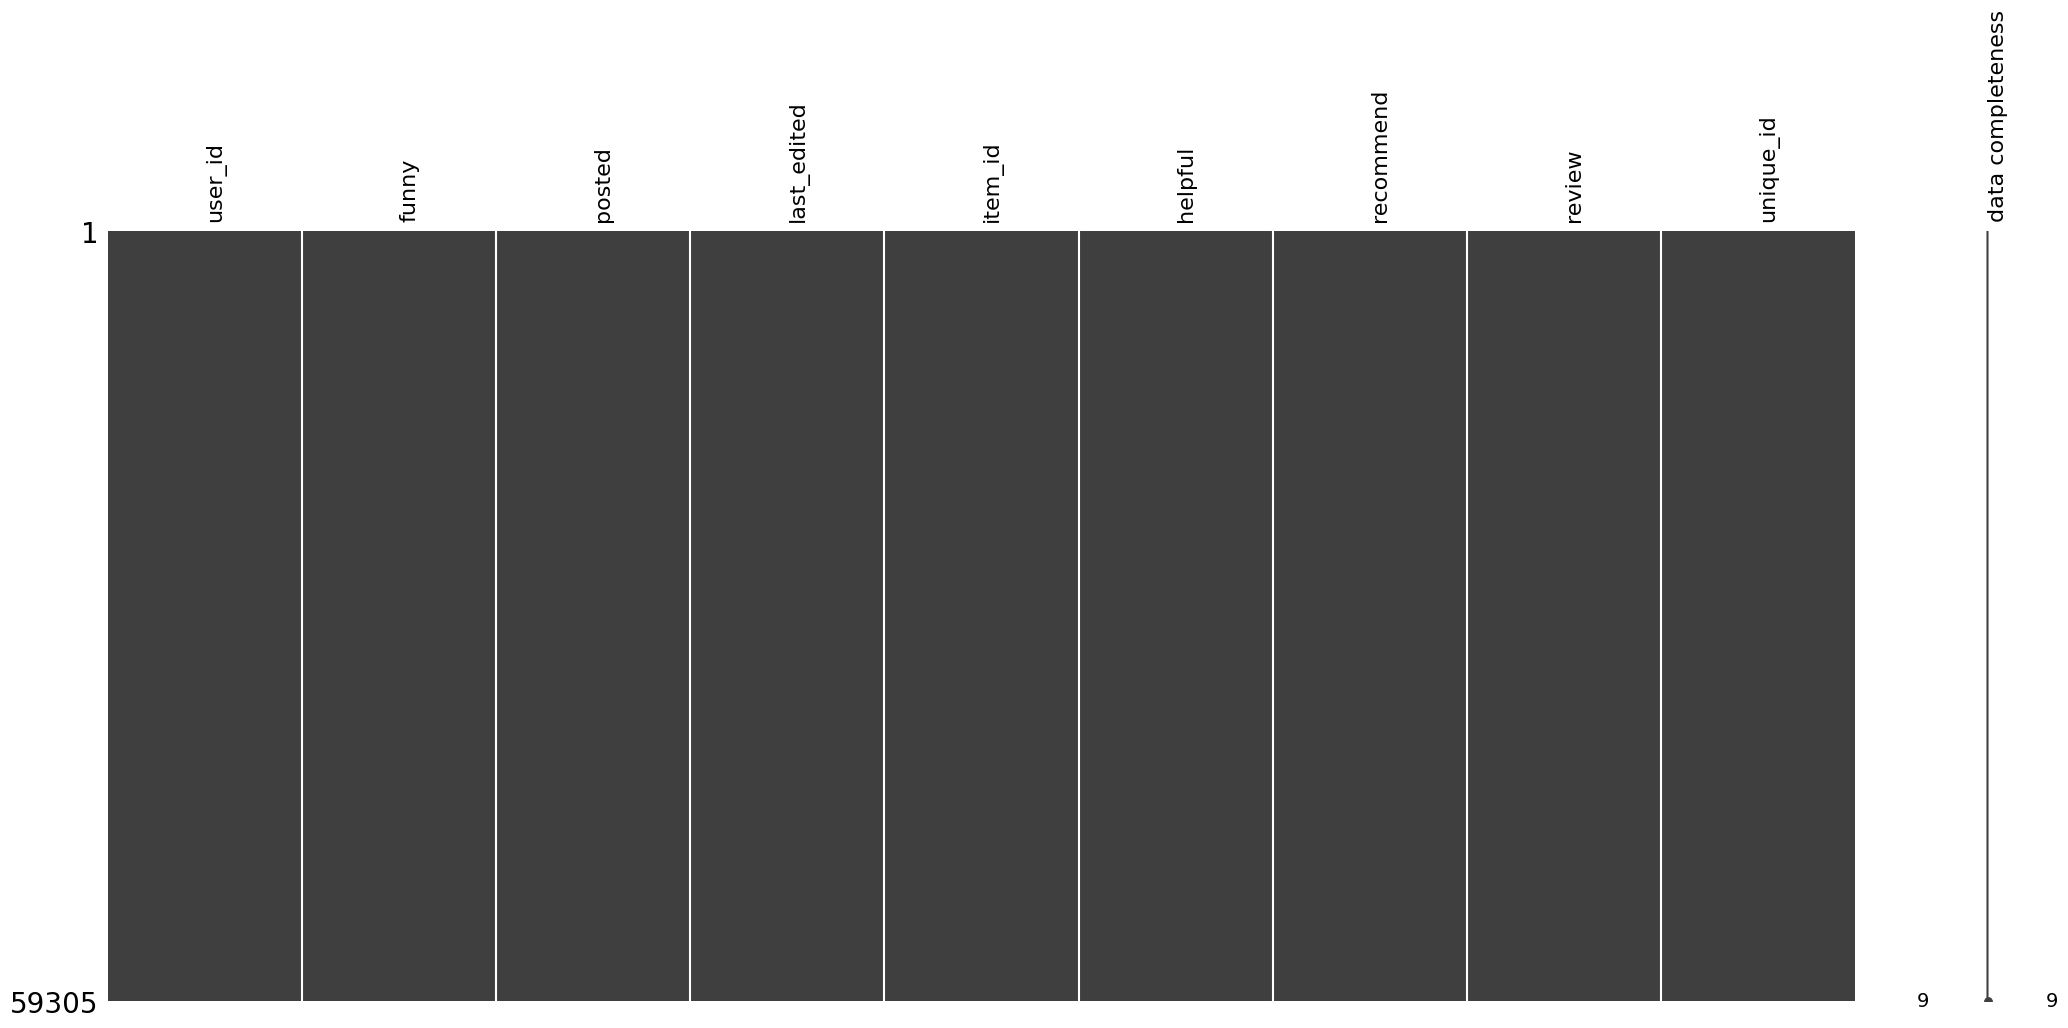

In [50]:
msno.matrix(df_reviews_split, labels=True, label_rotation=90)
plt.show()

In [51]:
df_reviews_split_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      58431 non-null  object
 1   funny        58431 non-null  object
 2   posted       58431 non-null  object
 3   last_edited  58431 non-null  object
 4   item_id      58431 non-null  object
 5   helpful      58431 non-null  object
 6   recommend    58431 non-null  bool  
 7   review       58431 non-null  object
 8   unique_id    58431 non-null  object
dtypes: bool(1), object(8)
memory usage: 4.1+ MB


Visualizo los valores únicos de la columna "posted".

In [52]:
df_reviews_split_unique['posted'].unique()

array(['Posted November 5, 2011.', 'Posted July 15, 2011.',
       'Posted April 21, 2011.', ..., 'Posted February 18, 2013.',
       'Posted November 13, 2012.', 'Posted November 3, 2012.'],
      dtype=object)

Ordeno la columna "posted" de modo ascendente.

In [53]:
df_reviews_split_unique = df_reviews_split_unique.sort_values(by='posted', ascending=False)
df_reviews_split_unique

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
42105,killeripilleri29,,Posted September 9.,,252950,1 of 1 people (100%) found this review helpful,True,One of the most fun games i've ever played.,killeripilleri29_Posted September 9.252950One ...
25335,76561198087650886,,Posted September 9.,,325724,No ratings yet,True,Muito boa!!,76561198087650886_Posted September 9.325724Mui...
41829,76561198091682568,,Posted September 9.,Last edited September 9.,474750,No ratings yet,True,So Reigns is a cute little card game where you...,76561198091682568_Posted September 9.474750So ...
3234,Delicous_Cookies,,Posted September 9.,Last edited September 10.,223710,No ratings yet,True,I have crippling depression.,Delicous_Cookies_Posted September 9.223710I ha...
51557,76561198067771967,,Posted September 9.,,220240,No ratings yet,True,BEST GAME EVER,76561198067771967_Posted September 9.220240BES...
...,...,...,...,...,...,...,...,...,...
13556,fergieandjesus,,"Posted April 1, 2013.",,1250,0 of 1 people (0%) found this review helpful,True,So much better than Call of Duty Zombies anyda...,"fergieandjesus_Posted April 1, 2013.1250So muc..."
4750,PinkPyroGames,,"Posted April 1, 2013.","Last edited March 1, 2015.",440,No ratings yet,True,"I Spent so much money on this game, love you v...","PinkPyroGames_Posted April 1, 2013.440I Spent ..."
17950,battlefrog,,"Posted April 1, 2013.",Last edited June 23.,730,No ratings yet,True,"When Team Fortress 2 become serious, this game...","battlefrog_Posted April 1, 2013.730When Team F..."
17698,Rubbercube,,"Posted April 1, 2012.","Last edited June 6, 2015.",440,1 of 4 people (25%) found this review helpful,True,bye wallet,"Rubbercube_Posted April 1, 2012.440bye wallet"


Visualizo la cantidad de datos que aparecen en la columna "posted" con el formato similar a 'Posted February 3.'

In [54]:
filtro = df_reviews_split_unique['posted'].str.contains(r'Posted \w+ \d+\.')
cantidad_coincidencias = filtro.sum()

print("Cantidad de datos con el formato similar a 'Posted February 3.':", cantidad_coincidencias)

Cantidad de datos con el formato similar a 'Posted February 3.': 9933


Visualizo el año más antiguo y el más actual que aparece en la columna "posted"

In [55]:
df_reviews_split_unique['year'] = df_reviews_split_unique['posted'].str.extract(r'(\d{4})')
df_reviews_split_unique['year'] = pd.to_numeric(df_reviews_split_unique['year'], errors='coerce')
fechas_con_anio = df_reviews_split_unique.dropna(subset=['year'])
primer_anio = fechas_con_anio['year'].min()
ultimo_anio = fechas_con_anio['year'].max()

print("Primer año:", primer_anio)
print("Último año:", ultimo_anio)

Primer año: 2010.0
Último año: 2015.0


Extraigo la fecha más actual de la columna "posted"

In [56]:
df_reviews_split_unique['year'] = df_reviews_split_unique['posted'].str.extract(r'(\d{4})')
df_reviews_split_unique['year'] = pd.to_numeric(df_reviews_split_unique['year'], errors='coerce')
fechas_con_anio = df_reviews_split_unique.dropna(subset=['year'])
ultimo_anio = fechas_con_anio['year'].max()
ultimas_fechas_del_ultimo_anio = fechas_con_anio[fechas_con_anio['year'] == ultimo_anio]
fecha_mas_reciente = ultimas_fechas_del_ultimo_anio['posted'].max()

print("Fecha más reciente del último año:", fecha_mas_reciente)


Fecha más reciente del último año: Posted September 9, 2015.


Tansformo los datos que contengan el formato de dato igual a 'Posted February 3.'completandolo con "2015" si es que el mes se corresponde a setiembre, octubre, noviembre y diciembre; caso contrario se incorpora "2016", porque entiendo que la falta de consignación de año responde o sigue la lógica de que ese dato era el que estaba cursando (o por lo menos a los doce meses anteriores) al momento de extraerse el data set.

In [57]:
df_reviews_split_unique

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id,year
42105,killeripilleri29,,Posted September 9.,,252950,1 of 1 people (100%) found this review helpful,True,One of the most fun games i've ever played.,killeripilleri29_Posted September 9.252950One ...,NaN
25335,76561198087650886,,Posted September 9.,,325724,No ratings yet,True,Muito boa!!,76561198087650886_Posted September 9.325724Mui...,NaN
41829,76561198091682568,,Posted September 9.,Last edited September 9.,474750,No ratings yet,True,So Reigns is a cute little card game where you...,76561198091682568_Posted September 9.474750So ...,NaN
3234,Delicous_Cookies,,Posted September 9.,Last edited September 10.,223710,No ratings yet,True,I have crippling depression.,Delicous_Cookies_Posted September 9.223710I ha...,NaN
51557,76561198067771967,,Posted September 9.,,220240,No ratings yet,True,BEST GAME EVER,76561198067771967_Posted September 9.220240BES...,NaN
...,...,...,...,...,...,...,...,...,...,...
13556,fergieandjesus,,"Posted April 1, 2013.",,1250,0 of 1 people (0%) found this review helpful,True,So much better than Call of Duty Zombies anyda...,"fergieandjesus_Posted April 1, 2013.1250So muc...",2013.0
4750,PinkPyroGames,,"Posted April 1, 2013.","Last edited March 1, 2015.",440,No ratings yet,True,"I Spent so much money on this game, love you v...","PinkPyroGames_Posted April 1, 2013.440I Spent ...",2013.0
17950,battlefrog,,"Posted April 1, 2013.",Last edited June 23.,730,No ratings yet,True,"When Team Fortress 2 become serious, this game...","battlefrog_Posted April 1, 2013.730When Team F...",2013.0
17698,Rubbercube,,"Posted April 1, 2012.","Last edited June 6, 2015.",440,1 of 4 people (25%) found this review helpful,True,bye wallet,"Rubbercube_Posted April 1, 2012.440bye wallet",2012.0


In [58]:
def completar_anio(fecha):
    if fecha.startswith('Posted'):
        if len(fecha.split()) == 3:
            mes = fecha.split()[1]
            meses_2015 = ['September', 'October', 'November', 'December']
            if mes in meses_2015:
                dia = fecha.split()[2][:-1]
                return f'{fecha[:-4]} 2015 {dia},'
            else:
                dia = fecha.split()[2][:-1]
                return f'{fecha[:-4]} 2016 {dia},'

    return fecha

df_reviews_split_unique['posted'] = df_reviews_split_unique['posted'].apply(completar_anio)

In [59]:
df_reviews_split_def = df_reviews_split_unique
df_reviews_split_def

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id,year
42105,killeripilleri29,,"Posted Septembe 2015 9,",,252950,1 of 1 people (100%) found this review helpful,True,One of the most fun games i've ever played.,killeripilleri29_Posted September 9.252950One ...,NaN
25335,76561198087650886,,"Posted Septembe 2015 9,",,325724,No ratings yet,True,Muito boa!!,76561198087650886_Posted September 9.325724Mui...,NaN
41829,76561198091682568,,"Posted Septembe 2015 9,",Last edited September 9.,474750,No ratings yet,True,So Reigns is a cute little card game where you...,76561198091682568_Posted September 9.474750So ...,NaN
3234,Delicous_Cookies,,"Posted Septembe 2015 9,",Last edited September 10.,223710,No ratings yet,True,I have crippling depression.,Delicous_Cookies_Posted September 9.223710I ha...,NaN
51557,76561198067771967,,"Posted Septembe 2015 9,",,220240,No ratings yet,True,BEST GAME EVER,76561198067771967_Posted September 9.220240BES...,NaN
...,...,...,...,...,...,...,...,...,...,...
13556,fergieandjesus,,"Posted April 1, 2013.",,1250,0 of 1 people (0%) found this review helpful,True,So much better than Call of Duty Zombies anyda...,"fergieandjesus_Posted April 1, 2013.1250So muc...",2013.0
4750,PinkPyroGames,,"Posted April 1, 2013.","Last edited March 1, 2015.",440,No ratings yet,True,"I Spent so much money on this game, love you v...","PinkPyroGames_Posted April 1, 2013.440I Spent ...",2013.0
17950,battlefrog,,"Posted April 1, 2013.",Last edited June 23.,730,No ratings yet,True,"When Team Fortress 2 become serious, this game...","battlefrog_Posted April 1, 2013.730When Team F...",2013.0
17698,Rubbercube,,"Posted April 1, 2012.","Last edited June 6, 2015.",440,1 of 4 people (25%) found this review helpful,True,bye wallet,"Rubbercube_Posted April 1, 2012.440bye wallet",2012.0


Visualizo la cantidad de datos que aparecen en la columna "posted" con el formato similar a 'Posted February 3.'

In [60]:
filtro = df_reviews_split_unique['posted'].str.contains(r'Posted \w+ \d+\.')
cantidad_coincidencias = filtro.sum()

print("Cantidad de datos con el formato similar a 'Posted February 3.':", cantidad_coincidencias)

Cantidad de datos con el formato similar a 'Posted February 3.': 0


In [61]:
df_reviews_split_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 42105 to 14492
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      58431 non-null  object 
 1   funny        58431 non-null  object 
 2   posted       58431 non-null  object 
 3   last_edited  58431 non-null  object 
 4   item_id      58431 non-null  object 
 5   helpful      58431 non-null  object 
 6   recommend    58431 non-null  bool   
 7   review       58431 non-null  object 
 8   unique_id    58431 non-null  object 
 9   year         48498 non-null  float64
dtypes: bool(1), float64(1), object(8)
memory usage: 4.5+ MB


B.- SENTIMENTAL ANALYSIS

Continuando con las consignas, en especial aquella que propone transformar a números los sentimientos de los usuarios expresados en las reseñas del data frame "reviews", para ejecutar la misma seguiré utilizando la tabla spliteada "df_reviews_split", por encontrarse mejor organizada y realizaré el análisis de sentimiento utilizando dos librerías (textblob y nltk), para comparar los resultados.

A partir de ello se generarán dos data frame nuevos, con el fin de mantener el original a los efectos de no perder la información trabajada allí; siendo los nuevos nombres "df_reviews_split_satext" y "df_reviews_split_sanltk".

-Resultados con TextBlob

In [62]:
df = df_reviews
df_reviews = pd.DataFrame(df_reviews)
claves = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']
nuevas_columnas = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 'user_id']
columna = 'reviews'
df_reviews_split = extraer_values(df, columna, claves, nuevas_columnas)

display(df_reviews_split)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [63]:
from textblob import TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_polarity = analysis.sentiment.polarity
    if sentiment_polarity < 0:
        return 0  # Malo
    elif sentiment_polarity == 0:
        return 1  # Neutral
    else:
        return 2  # Positivo

df_reviews_split_satext = df_reviews_split_def
df_reviews_split_def['sentiment_analysis'] = df_reviews_split_def['review'].apply(analyze_sentiment)

df_reviews_split_def.drop(columns=['review'], inplace=True)

In [64]:
display(df_reviews_split_satext)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,unique_id,year,sentiment_analysis
42105,killeripilleri29,,"Posted Septembe 2015 9,",,252950,1 of 1 people (100%) found this review helpful,True,killeripilleri29_Posted September 9.252950One ...,NaN,2
25335,76561198087650886,,"Posted Septembe 2015 9,",,325724,No ratings yet,True,76561198087650886_Posted September 9.325724Mui...,NaN,1
41829,76561198091682568,,"Posted Septembe 2015 9,",Last edited September 9.,474750,No ratings yet,True,76561198091682568_Posted September 9.474750So ...,NaN,2
3234,Delicous_Cookies,,"Posted Septembe 2015 9,",Last edited September 10.,223710,No ratings yet,True,Delicous_Cookies_Posted September 9.223710I ha...,NaN,1
51557,76561198067771967,,"Posted Septembe 2015 9,",,220240,No ratings yet,True,76561198067771967_Posted September 9.220240BES...,NaN,2
...,...,...,...,...,...,...,...,...,...,...
13556,fergieandjesus,,"Posted April 1, 2013.",,1250,0 of 1 people (0%) found this review helpful,True,"fergieandjesus_Posted April 1, 2013.1250So muc...",2013.0,2
4750,PinkPyroGames,,"Posted April 1, 2013.","Last edited March 1, 2015.",440,No ratings yet,True,"PinkPyroGames_Posted April 1, 2013.440I Spent ...",2013.0,2
17950,battlefrog,,"Posted April 1, 2013.",Last edited June 23.,730,No ratings yet,True,"battlefrog_Posted April 1, 2013.730When Team F...",2013.0,0
17698,Rubbercube,,"Posted April 1, 2012.","Last edited June 6, 2015.",440,1 of 4 people (25%) found this review helpful,True,"Rubbercube_Posted April 1, 2012.440bye wallet",2012.0,1


-Resultados con NLTK

In [65]:
df_reviews_split_def.columns

Index(['user_id', 'funny', 'posted', 'last_edited', 'item_id', 'helpful',
       'recommend', 'unique_id', 'year', 'sentiment_analysis'],
      dtype='object')

Vuelvo a llamar la función para crear nuevamente el df_reviews_split y aplico todos los procesos de depuración hasta llegar a df_reviews_split_def

In [66]:
df = df_reviews
df_reviews = pd.DataFrame(df_reviews)
claves = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']
nuevas_columnas = ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 'user_id']
columna = 'reviews'
df_reviews_split = extraer_values(df, columna, claves, nuevas_columnas)

display(df_reviews_split)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [67]:
df_reviews_split['unique_id'] = df_reviews_split['user_id'].astype(str) + '_'+ df_reviews_split['posted'].astype(str) + df_reviews_split['item_id'].astype(str)+ df_reviews_split['review'].astype(str)

df_reviews_split_unique = df_reviews_split.drop_duplicates('unique_id')
df_reviews_split_unique

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250..."
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It..."
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G..."
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what..."
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s..."
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244_Posted July 10.70a must have...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244_Posted July 8.362890this gam...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley_Posted July 3.273110had so much fu...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley_Posted July 20.730:D


In [68]:
def completar_anio(fecha):
    if fecha.startswith('Posted'):
        if len(fecha.split()) == 3:
            mes = fecha.split()[1]
            meses_2015 = ['September', 'October', 'November', 'December']
            if mes in meses_2015:
                dia = fecha.split()[2][:-1]
                return f'{fecha[:-4]} 2015 {dia},'
            else:
                dia = fecha.split()[2][:-1]
                return f'{fecha[:-4]} 2016 {dia},'

    return fecha

df_reviews_split_unique['posted'] = df_reviews_split_unique['posted'].apply(completar_anio)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\4134052263.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_split_unique['posted'] = df_reviews_split_unique['posted'].apply(completar_anio)


In [69]:
df_reviews_split_def = df_reviews_split_unique
df_reviews_split_def

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250..."
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It..."
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G..."
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what..."
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s..."
...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,,"Posted July 2016 10,",,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244_Posted July 10.70a must have...
59301,76561198312638244,,"Posted Jul 2016 8,",,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244_Posted July 8.362890this gam...
59302,LydiaMorley,1 person found this review funny,"Posted Jul 2016 3,",,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley_Posted July 3.273110had so much fu...
59303,LydiaMorley,,"Posted July 2016 20,",,730,No ratings yet,True,:D,LydiaMorley_Posted July 20.730:D


In [70]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score < -0.05:
        return 0  # Malo
    elif compound_score > 0.05:
        return 2  # Positivo
    else:
        return 1  # Neutral

df_reviews_split_sanltk = df_reviews_split_unique
df_reviews_split_unique['sentiment_analysis'] = df_reviews_split_unique['review'].apply(analyze_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\711769829.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_split_unique['sentiment_analysis'] = df_reviews_split_unique['review'].apply(analyze_sentiment)


In [71]:
df_reviews_split.drop(columns=['review'], inplace=True)

In [72]:
display(df_reviews_split_sanltk)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id,sentiment_analysis
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250...",2
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It...",2
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G...",2
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what...",2
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s...",2
...,...,...,...,...,...,...,...,...,...,...
59300,76561198312638244,,"Posted July 2016 10,",,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244_Posted July 10.70a must have...,2
59301,76561198312638244,,"Posted Jul 2016 8,",,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244_Posted July 8.362890this gam...,2
59302,LydiaMorley,1 person found this review funny,"Posted Jul 2016 3,",,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley_Posted July 3.273110had so much fu...,2
59303,LydiaMorley,,"Posted July 2016 20,",,730,No ratings yet,True,:D,LydiaMorley_Posted July 20.730:D,2


Ahora imprimiendo las 20 primeras líneas de cada data frame modificado compararemos si el análisis de sentimiento ha variado en cada row, realizando debajo de cada uno un diagrama de pastel para visualizar la composición y distribución de los datos de la columna.

In [73]:
df_reviews_split_satext.head(20)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,unique_id,year,sentiment_analysis
42105,killeripilleri29,,"Posted Septembe 2015 9,",,252950,1 of 1 people (100%) found this review helpful,True,killeripilleri29_Posted September 9.252950One ...,NaN,2
25335,76561198087650886,,"Posted Septembe 2015 9,",,325724,No ratings yet,True,76561198087650886_Posted September 9.325724Mui...,NaN,1
41829,76561198091682568,,"Posted Septembe 2015 9,",Last edited September 9.,474750,No ratings yet,True,76561198091682568_Posted September 9.474750So ...,NaN,2
3234,Delicous_Cookies,,"Posted Septembe 2015 9,",Last edited September 10.,223710,No ratings yet,True,Delicous_Cookies_Posted September 9.223710I ha...,NaN,1
51557,76561198067771967,,"Posted Septembe 2015 9,",,220240,No ratings yet,True,76561198067771967_Posted September 9.220240BES...,NaN,2
6911,XiPonds,,"Posted Septembe 2015 9,",,49520,No ratings yet,True,XiPonds_Posted September 9.49520Best game in m...,NaN,2
18352,whisperrrrrrr,,"Posted Septembe 2015 9,",,49520,No ratings yet,True,whisperrrrrrr_Posted September 9.49520This gam...,NaN,2
33255,76561198320203075,,"Posted Septembe 2015 9,",,730,No ratings yet,True,76561198320203075_Posted September 9.730Used p...,NaN,0
237,jonasdbomb,2 people found this review funny,"Posted Septembe 2015 9,",,346110,2 of 12 people (17%) found this review helpful,True,jonasdbomb_Posted September 9.346110So I play ...,NaN,2
15528,mazkg,,"Posted Septembe 2015 9,",,730,1 of 2 people (50%) found this review helpful,True,mazkg_Posted September 9.730บางปืนก็เล่นยากกก ...,NaN,1


Ggraficar distribución final

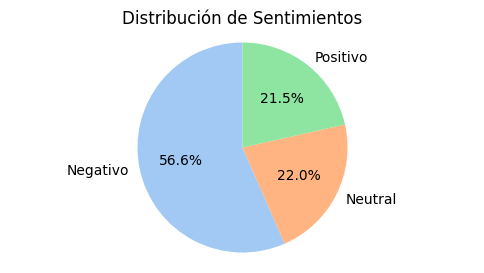

In [74]:
sentiment_counts = df_reviews_split_satext['sentiment_analysis'].value_counts()
labels = ['Negativo', 'Neutral', 'Positivo']
sizes = sentiment_counts.values
plt.figure(figsize=(6, 3))
sns.set_palette("pastel")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Distribución de Sentimientos')

plt.show()

In [75]:
df_reviews_split_sanltk.head(10)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review,unique_id,sentiment_analysis
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,"76561197970982479_Posted November 5, 2011.1250...",2
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,"76561197970982479_Posted July 15, 2011.22200It...",2
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,"76561197970982479_Posted April 21, 2011.43110G...",2
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,"js41637_Posted June 24, 2014.251610I know what...",2
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,"js41637_Posted September 8, 2013.227300For a s...",2
5,js41637,,"Posted November 29, 2013.",,239030,1 of 4 people (25%) found this review helpful,True,Very fun little game to play when your bored o...,"js41637_Posted November 29, 2013.239030Very fu...",2
6,evcentric,,"Posted Februar 2016 3,",,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,evcentric_Posted February 3.248820A suitably p...,2
7,evcentric,,"Posted December 4, 2015.","Last edited December 5, 2015.",370360,No ratings yet,True,"""Run for fun? What the hell kind of fun is that?""","evcentric_Posted December 4, 2015.370360""Run f...",2
8,evcentric,,"Posted November 3, 2014.",,237930,No ratings yet,True,"Elegant integration of gameplay, story, world ...","evcentric_Posted November 3, 2014.237930Elegan...",2
9,evcentric,,"Posted October 15, 2014.",,263360,No ratings yet,True,"Random drops and random quests, with stat poin...","evcentric_Posted October 15, 2014.263360Random...",1


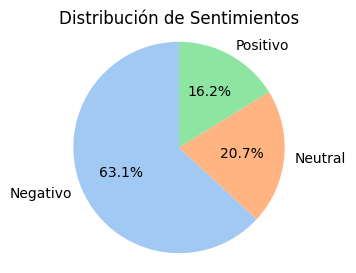

In [76]:
sentiment_counts = df_reviews_split_sanltk['sentiment_analysis'].value_counts()
labels = ['Negativo', 'Neutral', 'Positivo']
sizes = sentiment_counts.values
plt.figure(figsize=(3, 3))
sns.set_palette("pastel")
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Distribución de Sentimientos')

plt.show()

De la comparación de ambos data frame modificados puede verse que la columna "sentiment_analysis" no coinciden, pudiendose afirmar que en el desarrollado con la librería textblob tiene una tendencia más "positiva" y, por ende útil para el futuro modelo de recomendación, ya que para ello necesesitamos que haya la mayor cantidad de recomendaciones positivas, o por lo menos neutrales, para que el modelo funcione mejor.

C.- Continuando con la depuración de los datos a trabajar, en primer término de aquí en más solo utilizaré los data sets que usaré para el proyecto final, a saber: 'df_reviews', 'df_games', 'df_items', 'df_reviews_split_satext' y 'df_games_split'. A ellos aplicaré una eliminación de las columnas que me serán útiles para el proyecto, borrando los valores duplicados de las que queden, en caso de corresponder, y realizaré demás procedimientos de limpieza y transformación de dato pertinente para cada caso.

- df_reviews

In [77]:
df_reviews = df_reviews[['user_id', 'user_url']]
df_reviews

,user_id,user_url
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,http://steamcommunity.com/id/js41637
2,evcentric,http://steamcommunity.com/id/evcentric
3,doctr,http://steamcommunity.com/id/doctr
4,maplemage,http://steamcommunity.com/id/maplemage
...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...


Ver valores repetidos en user_id

In [78]:
user_ids_unique = df_reviews['user_id'].value_counts()
print(user_ids_unique)

user_id
76561198027488037    3
76561198045953692    3
76561198051777058    3
76561198100326818    3
blablabla174         3
                    ..
SakurasouNo          1
goneckahorse         1
coutlindo            1
superdedicated       1
LydiaMorley          1
Name: count, Length: 25485, dtype: int64


Borrar valores repetidos en user_id

In [79]:
df_reviews_unique = df_reviews.drop_duplicates('user_id')
df_reviews_unique

,user_id,user_url
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,http://steamcommunity.com/id/js41637
2,evcentric,http://steamcommunity.com/id/evcentric
3,doctr,http://steamcommunity.com/id/doctr
4,maplemage,http://steamcommunity.com/id/maplemage
...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...


In [80]:
df_reviews_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25485 entries, 0 to 25798
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25485 non-null  object
 1   user_url  25485 non-null  object
dtypes: object(2)
memory usage: 597.3+ KB


- df_items

In [81]:
df_items = df_items[['user_id', 'items_count', 'steam_id', 'user_url']]
df_items

,user_id,items_count,steam_id,user_url
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr
...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


Visualizamos los valores repetidos por user_id

In [82]:
user_ids_unique = df_items['user_id'].value_counts()
print(user_ids_unique)

user_id
X03-Suits            3
76561198027488037    3
76561198100326818    3
76561198309337430    3
76561198051777058    3
                    ..
8392158              1
76561198056804863    1
SparklezTheTurtle    1
76561198019707497    1
edward_tremethick    1
Name: count, Length: 87626, dtype: int64


Borrar valores repetidos en user_id

In [83]:
df_items_unique = df_items.drop_duplicates('user_id')
df_items_unique

,user_id,items_count,steam_id,user_url
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr
...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


In [85]:
df_items_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87626 entries, 0 to 88309
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      87626 non-null  object
 1   items_count  87626 non-null  int64 
 2   steam_id     87626 non-null  object
 3   user_url     87626 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


- df_reviews_split_satext

In [86]:
df_reviews_split_satext = df_reviews_split_satext[['user_id', 'posted','item_id','recommend','sentiment_analysis']]
df_reviews_split_satext

,user_id,posted,item_id,recommend,sentiment_analysis
42105,killeripilleri29,"Posted Septembe 2015 9,",252950,True,2
25335,76561198087650886,"Posted Septembe 2015 9,",325724,True,1
41829,76561198091682568,"Posted Septembe 2015 9,",474750,True,2
3234,Delicous_Cookies,"Posted Septembe 2015 9,",223710,True,1
51557,76561198067771967,"Posted Septembe 2015 9,",220240,True,2
...,...,...,...,...,...
13556,fergieandjesus,"Posted April 1, 2013.",1250,True,2
4750,PinkPyroGames,"Posted April 1, 2013.",440,True,2
17950,battlefrog,"Posted April 1, 2013.",730,True,0
17698,Rubbercube,"Posted April 1, 2012.",440,True,1


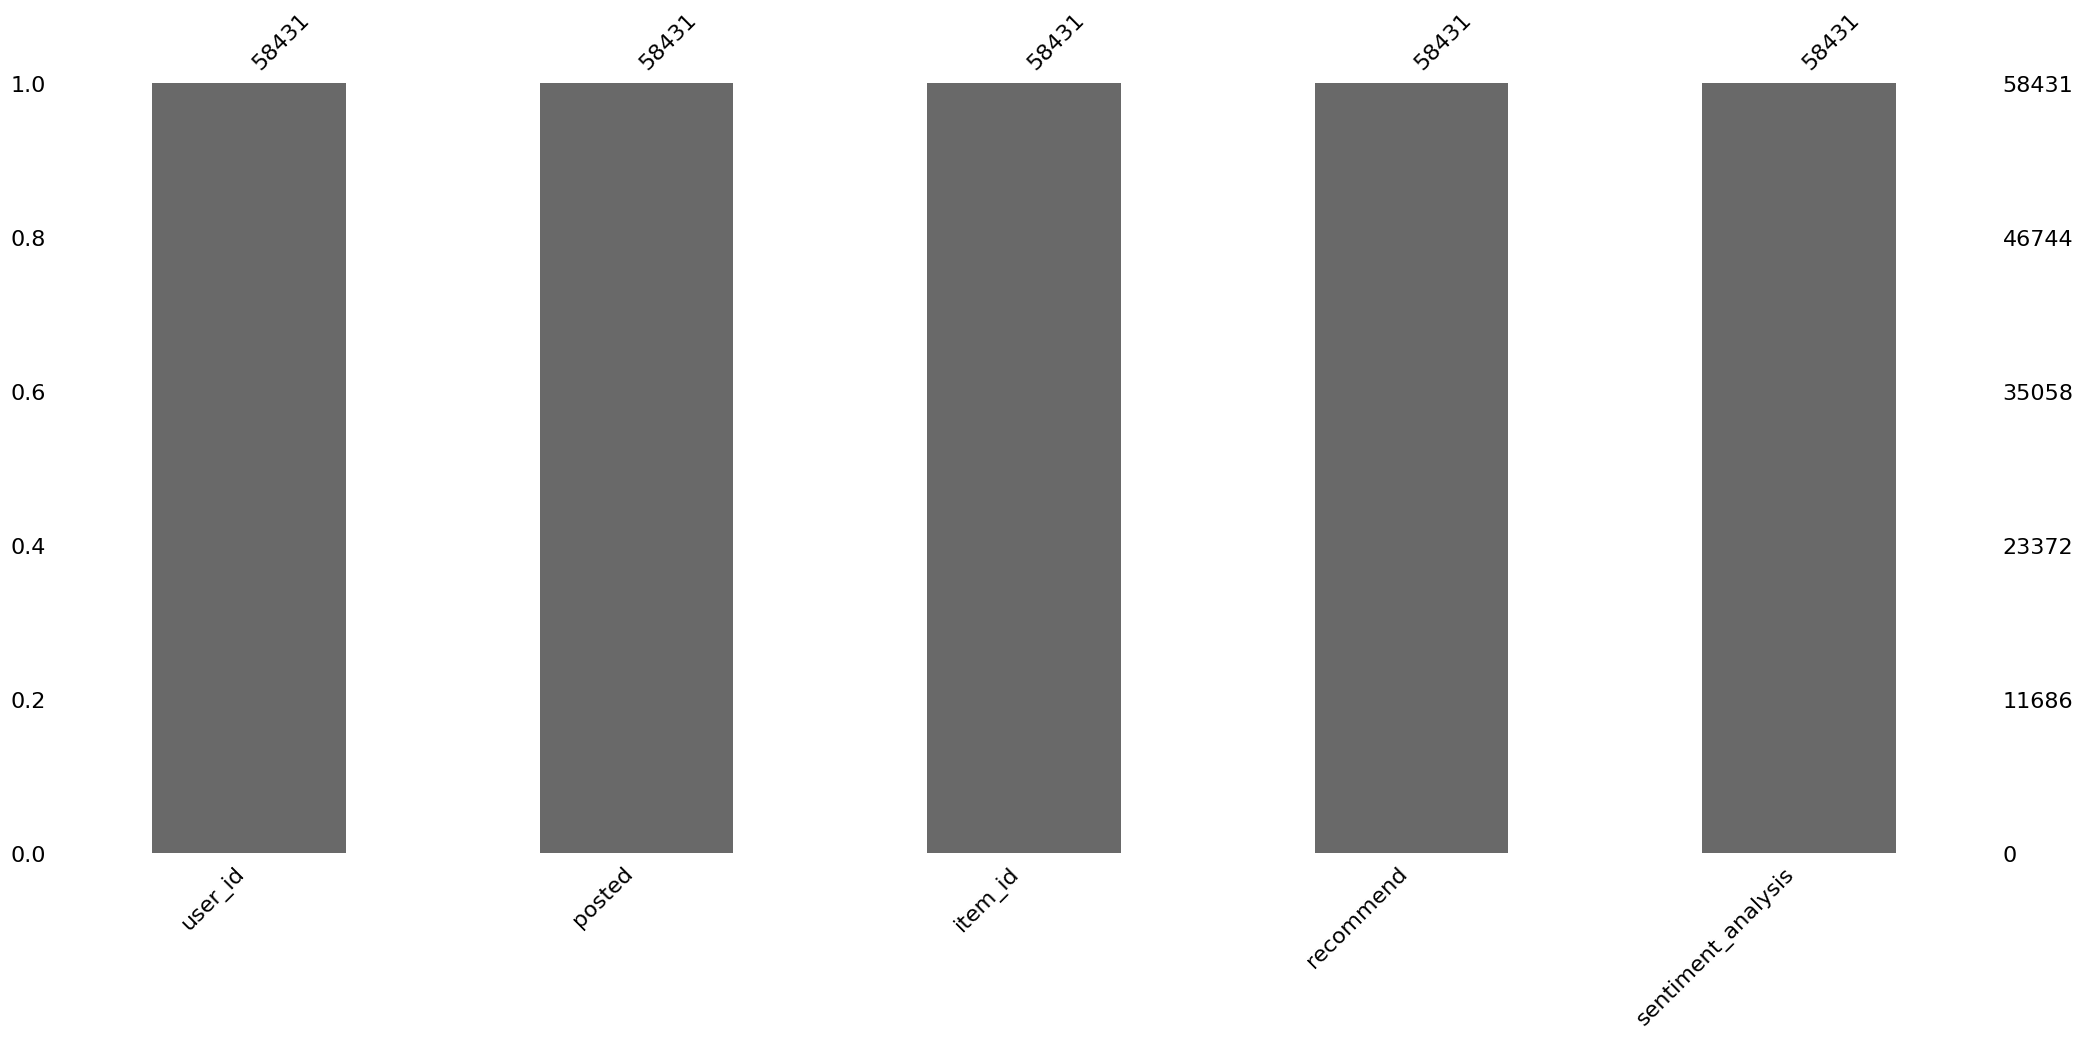

In [87]:
msno.bar(df_reviews_split_satext)
plt.show()

Modifico el tipo de dato de las columnas "posted" a formato fecha.

In [88]:
def extract_date(text):
    date_pattern = r'(\b\w+\s\d{1,2},?\s\d{4}\b)|(\b\w+\s\d{4}\s\d{1,2}\b)'
    date_match = re.search(date_pattern, text)
    if date_match:
        return pd.to_datetime(date_match.group(), errors='coerce')
    else:
        return pd.NaT

df_reviews_split_satext['posted'] = df_reviews_split_satext['posted'].apply(extract_date)

print(df_reviews_split_satext)

                 user_id     posted item_id  recommend  sentiment_analysis
42105   killeripilleri29        NaT  252950       True                   2
25335  76561198087650886        NaT  325724       True                   1
41829  76561198091682568        NaT  474750       True                   2
3234    Delicous_Cookies        NaT  223710       True                   1
51557  76561198067771967        NaT  220240       True                   2
...                  ...        ...     ...        ...                 ...
13556     fergieandjesus 2013-04-01    1250       True                   2
4750       PinkPyroGames 2013-04-01     440       True                   2
17950         battlefrog 2013-04-01     730       True                   0
17698         Rubbercube 2012-04-01     440       True                   1
14492             lozone 2012-04-01  105600       True                   0

[58431 rows x 5 columns]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\2027025426.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_split_satext['posted'] = df_reviews_split_satext['posted'].apply(extract_date)


In [89]:
df_reviews_split_satext_def = df_reviews_split_satext

In [91]:
df_reviews_split_satext_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 42105 to 14492
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             58431 non-null  object        
 1   posted              56120 non-null  datetime64[ns]
 2   item_id             58431 non-null  object        
 3   recommend           58431 non-null  bool          
 4   sentiment_analysis  58431 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


- df_games_split

In [92]:
df_games_split

,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,10,Counter-Strike,6,0
1,76561197970982479,20,Team Fortress Classic,0,0
2,76561197970982479,30,Day of Defeat,7,0
3,76561197970982479,40,Deathmatch Classic,0,0
4,76561197970982479,50,Half-Life: Opposing Force,0,0
...,...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0,0
5153205,76561198329548331,373330,All Is Dust,0,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4,4


In [93]:
df_games_split = df_games_split [['user_id', 'item_id',	'item_name', 'playtime_forever']]
df_games_split

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0
2,76561197970982479,30,Day of Defeat,7
3,76561197970982479,40,Deathmatch Classic,0
4,76561197970982479,50,Half-Life: Opposing Force,0
...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0
5153205,76561198329548331,373330,All Is Dust,0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3
5153207,76561198329548331,521570,You Have 10 Seconds 2,4


Visualizar los valores repetidos

In [94]:
df_games_split['unique_id'] = df_games_split['item_id'].astype(str) + '_' + df_games_split['item_name'].astype(str) + '_' + df_games_split['playtime_forever'].astype(str)
df_games_split_unique = df_games_split.loc[~df_games_split['unique_id'].duplicated(keep='first')]

df_games_split_unique

,user_id,item_id,item_name,playtime_forever,unique_id
0,76561197970982479,10,Counter-Strike,6,10_Counter-Strike_6
1,76561197970982479,20,Team Fortress Classic,0,20_Team Fortress Classic_0
2,76561197970982479,30,Day of Defeat,7,30_Day of Defeat_7
3,76561197970982479,40,Deathmatch Classic,0,40_Deathmatch Classic_0
4,76561197970982479,50,Half-Life: Opposing Force,0,50_Half-Life: Opposing Force_0
...,...,...,...,...,...
5152666,76561198314015545,403430,ARCADE GAME SERIES: GALAGA,12,403430_ARCADE GAME SERIES: GALAGA_12
5152667,76561198315899135,285900,Gang Beasts,213,285900_Gang Beasts_213
5152671,76561198319916652,370240,NBA 2K16,1533,370240_NBA 2K16_1533
5152676,76561198320038728,346330,BrainBread 2,756,346330_BrainBread 2_756


Borrar valores repetidos en user_id, en tanto se repitan en 'item_id', 'item_name' y 'playtime_forever'

In [95]:
df_games_split['unique_id'] = df_games_split['item_id'].astype(str) + '_' + df_games_split['item_name'].astype(str) + '_' + df_games_split['playtime_forever'].astype(str)
df_games_split_unique = df_games_split.loc[~df_games_split['unique_id'].duplicated()]

df_games_split_unique = df_games_split_unique.drop_duplicates(subset=['user_id', 'item_id', 'item_name', 'playtime_forever'])
df_games_split_unique

,user_id,item_id,item_name,playtime_forever,unique_id
0,76561197970982479,10,Counter-Strike,6,10_Counter-Strike_6
1,76561197970982479,20,Team Fortress Classic,0,20_Team Fortress Classic_0
2,76561197970982479,30,Day of Defeat,7,30_Day of Defeat_7
3,76561197970982479,40,Deathmatch Classic,0,40_Deathmatch Classic_0
4,76561197970982479,50,Half-Life: Opposing Force,0,50_Half-Life: Opposing Force_0
...,...,...,...,...,...
5152666,76561198314015545,403430,ARCADE GAME SERIES: GALAGA,12,403430_ARCADE GAME SERIES: GALAGA_12
5152667,76561198315899135,285900,Gang Beasts,213,285900_Gang Beasts_213
5152671,76561198319916652,370240,NBA 2K16,1533,370240_NBA 2K16_1533
5152676,76561198320038728,346330,BrainBread 2,756,346330_BrainBread 2_756


Visualizo el tipo de dato de cada columna

In [96]:
df_games_split_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1386399 entries, 0 to 5153000
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1386399 non-null  object
 1   item_id           1386399 non-null  object
 2   item_name         1386399 non-null  object
 3   playtime_forever  1386399 non-null  int64 
 4   unique_id         1386399 non-null  object
dtypes: int64(1), object(4)
memory usage: 63.5+ MB


Cambio el tipo de dato de la columna 'item_id'

In [97]:
df_games_split_unique['item_id'] = df_games_split_unique['item_id'].astype('int')

In [98]:
df_games_split_unique = df_games_split_unique[['user_id', 'item_id', 'item_name', 'playtime_forever']]
df_games_split_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1386399 entries, 0 to 5153000
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1386399 non-null  object
 1   item_id           1386399 non-null  int32 
 2   item_name         1386399 non-null  object
 3   playtime_forever  1386399 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 47.6+ MB


- df_games

In [99]:
df_games_filt = df_games[['genres', 'release_date', 'tags', 'discount_price', 'price', 'early_access', 'id', 'developer', 'user_id', 'steam_id', 'items_count']]

df_games_filt

,genres,release_date,tags,discount_price,price,early_access,id,developer,user_id,steam_id,items_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76561197970982479,76561197970982479,277.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,js41637,76561198035864385,888.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,evcentric,76561198007712555,137.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Riot-Punch,76561197963445855,328.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doctr,76561198002099482,541.0
...,...,...,...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN,NaN
120441,"[Casual, Indie, Strategy]",2018-01-04,"[Strategy, Indie, Casual]",4.24,4.99,False,733530,Sacada,NaN,NaN,NaN
120442,"[Indie, Racing, Simulation]",2018-01-04,"[Indie, Simulation, Racing]",1.39,1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN,NaN
120443,"[Casual, Indie]",2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,4.99,False,658870,"xropi,stev3ns",NaN,NaN,NaN


Visualizo la distribución de los datos por cada columna.

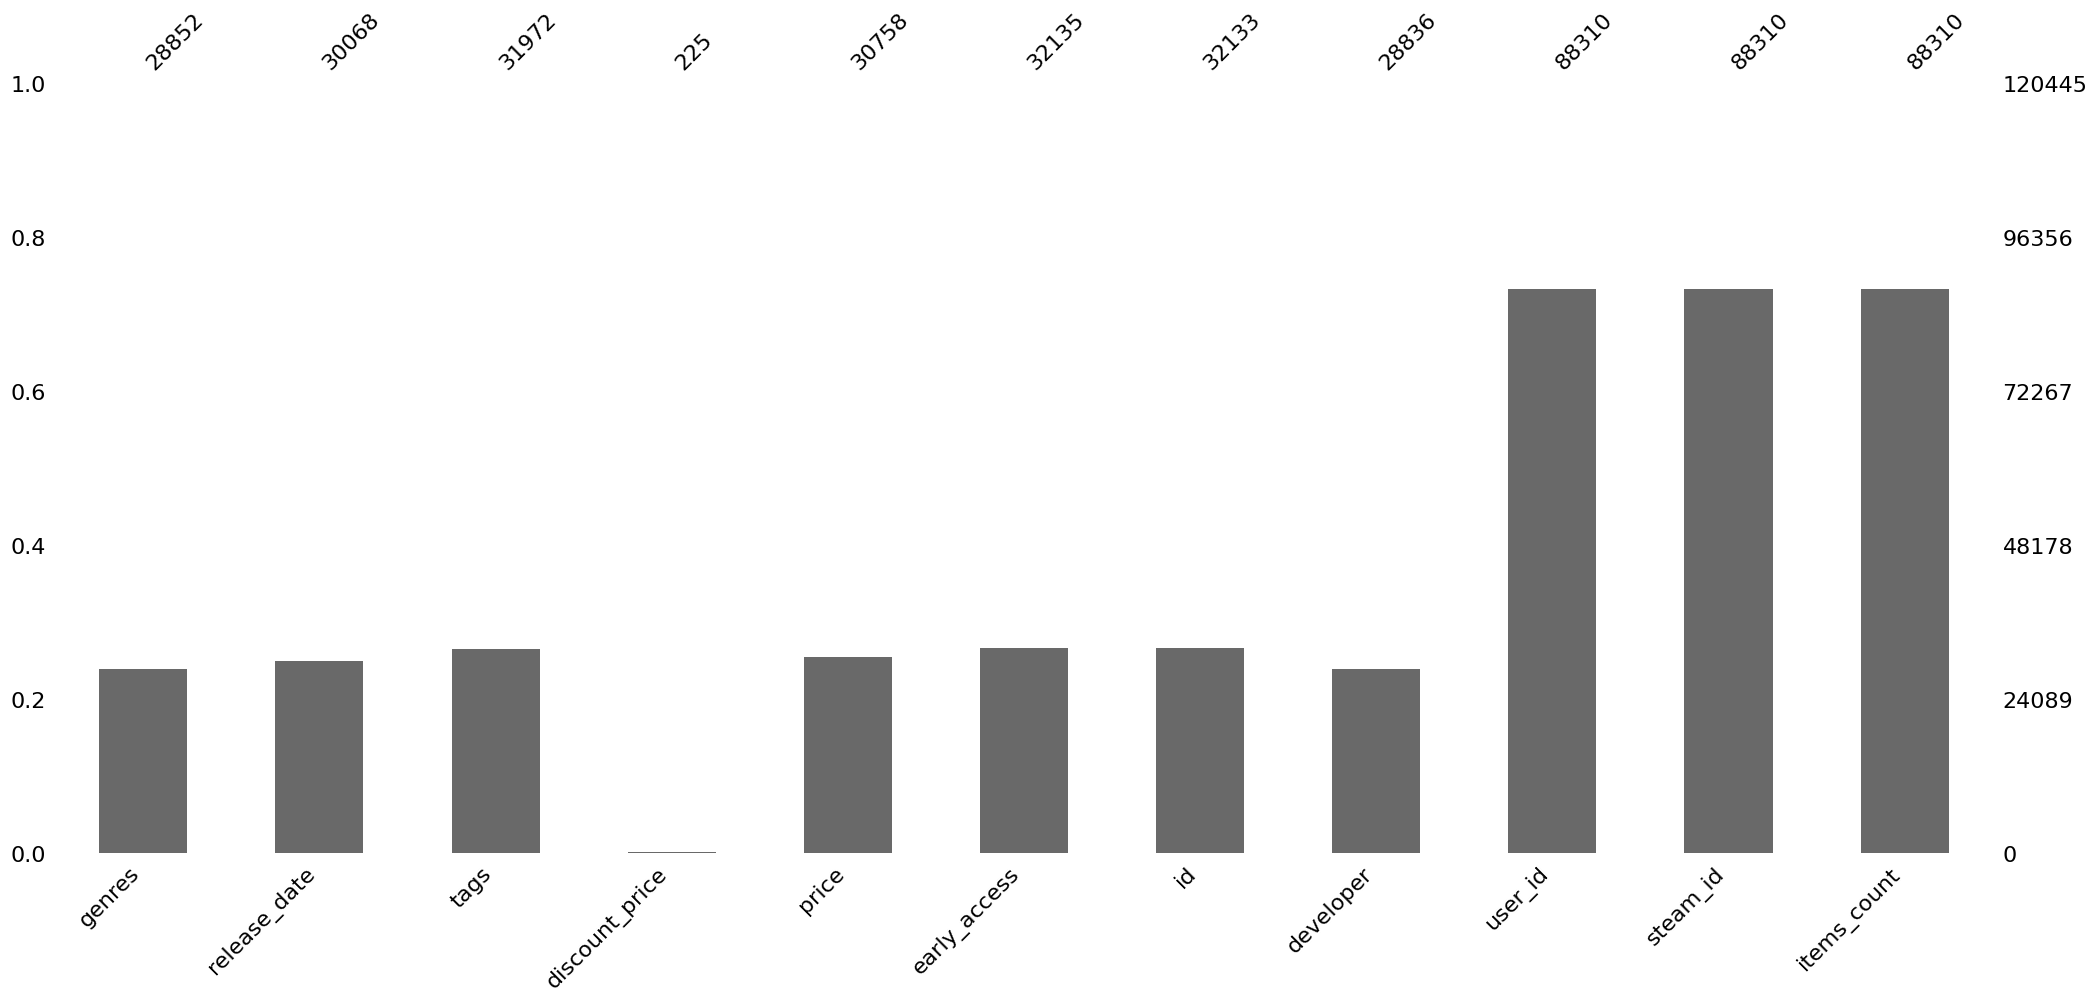

In [100]:
msno.bar(df_games_filt)
plt.show()

A diferencias de los dataframe anteriores, éste presenta una complegidad mayor y requiere de una manipulación más minuciosa, que consistirá en las siguientes tareas:

1-Completar las filas con valores nulos que se encuentren en la columna 'genres' utilizando los datos que se encuentren en la columna 'tags'

Visualicemos cuantos valores nulos hay en cada una de las columnas.

In [101]:
num_genres_null = df_games['genres'].isnull().sum()
num_tags_null = df_games['tags'].isnull().sum()
results = (num_genres_null, num_tags_null)

print(results)

(91593, 88473)


Reemplazamos valores nulos de la columna 'genres' por los valores en tags.

In [102]:
df_games_filt['genres'].fillna(df_games_filt['tags'], inplace=True)
print(df_games_filt)

                                                   genres release_date  \
0                                                     NaN          NaN   
1                                                     NaN          NaN   
2                                                     NaN          NaN   
3                                                     NaN          NaN   
4                                                     NaN          NaN   
...                                                   ...          ...   
120440              [Casual, Indie, Simulation, Strategy]   2018-01-04   
120441                          [Casual, Indie, Strategy]   2018-01-04   
120442                        [Indie, Racing, Simulation]   2018-01-04   
120443                                    [Casual, Indie]   2017-09-02   
120444  [Early Access, Adventure, Indie, Action, Simul...          NaN   

                                                     tags  discount_price  \
0                                 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\886554489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_filt['genres'].fillna(df_games_filt['tags'], inplace=True)


Volvemos a llamar la tupla de comparación de valores nulos para ver como quedarón ambas columnas.

In [103]:
num_genres_null = df_games_filt['genres'].isnull().sum()
num_tags_null = df_games_filt['tags'].isnull().sum()
results = (num_genres_null, num_tags_null)

print(results)

(88449, 88473)


Visualicemimos como estan distribuidos los datos en cada columna.

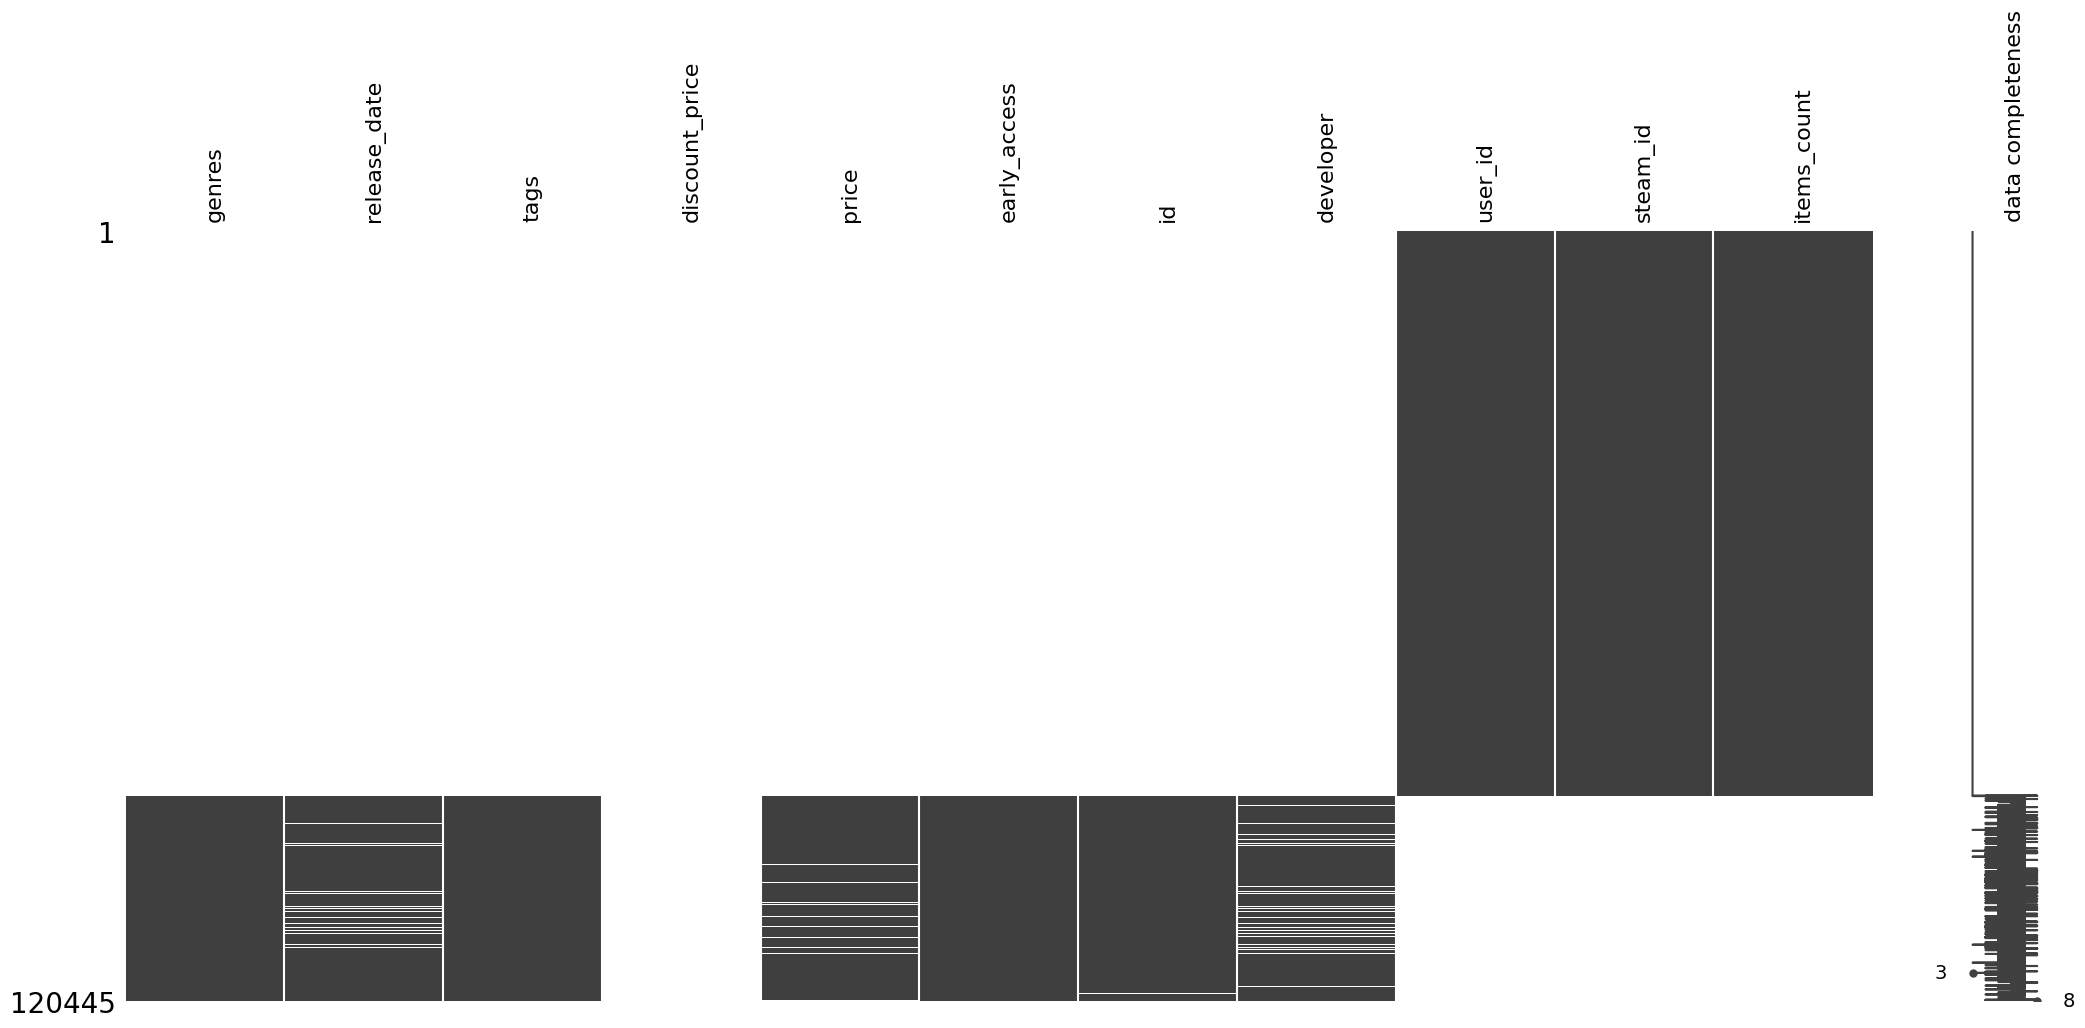

In [104]:
msno.matrix(df_games_filt, labels=True, label_rotation=90)
plt.show()

Obtengo los valores únicos de la columna id

In [105]:
unique_ids = df_games_filt['id'].unique()

print(unique_ids)

[nan '761140' '643980' ... '610660' '658870' '681550']


In [106]:
df_games_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          31996 non-null  object 
 1   release_date    30068 non-null  object 
 2   tags            31972 non-null  object 
 3   discount_price  225 non-null    float64
 4   price           30758 non-null  object 
 5   early_access    32135 non-null  object 
 6   id              32133 non-null  object 
 7   developer       28836 non-null  object 
 8   user_id         88310 non-null  object 
 9   steam_id        88310 non-null  object 
 10  items_count     88310 non-null  float64
dtypes: float64(2), object(9)
memory usage: 10.1+ MB


De los códigos y sus impresiones, ejecutados hasta acá, puede afirmarse que el data frame df_games y sus derivaciones se divide en cuatro cuadrantes, siendo relevantes el cuadrante inferior izquierdo y el cuadrante superior derecho, agregando que éste se asemeja en contenido al dataframe df_reviews y sus derivaciones, por lo que éste sector del dataframe podría borrarse y utilizarse directamente el dataframe mencionado ya que ambos se vincularían por df_games[id] y df_reviews[item_id].

2.-A partir de esa afirmación ello entiendo apropiado hacer una primera división del mismo desde la columan "genres" hasta "developer" en un primer subset y desde "user_id2 a "items_count", el segundo, para luego eliminar las filas que tenga todas sus columnas vacias y realizar las demas transformaciones que requiera en particular.

In [107]:
df_games_filt1 = df_games_filt[['genres', 'release_date', 'tags', 'discount_price', 'price', 'early_access', 'id', 'developer']]
df_games_filt1

,genres,release_date,tags,discount_price,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",2018-01-04,"[Strategy, Indie, Casual]",4.24,4.99,False,733530,Sacada
120442,"[Indie, Racing, Simulation]",2018-01-04,"[Indie, Simulation, Racing]",1.39,1.99,False,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,4.99,False,658870,"xropi,stev3ns"


Renombro la columna id por item_id

In [108]:
df_games_filt1 = df_games_filt1.rename(columns={'id': 'item_id'})

In [109]:
df_games_filt1.columns

Index(['genres', 'release_date', 'tags', 'discount_price', 'price',
       'early_access', 'item_id', 'developer'],
      dtype='object')

In [110]:
df_games_filt2 = df_games_filt[['user_id', 'steam_id', 'items_count']]
df_games_filt2

,user_id,steam_id,items_count
0,76561197970982479,76561197970982479,277.0
1,js41637,76561198035864385,888.0
2,evcentric,76561198007712555,137.0
3,Riot-Punch,76561197963445855,328.0
4,doctr,76561198002099482,541.0
...,...,...,...
120440,NaN,NaN,NaN
120441,NaN,NaN,NaN
120442,NaN,NaN,NaN
120443,NaN,NaN,NaN


Eliminar las filas que tengan datos nulos en todas sus columnas

In [111]:
df_games_filt1 = df_games_filt1.dropna(how='all')
df_games_filt1

,genres,release_date,tags,discount_price,price,early_access,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,4.99,False,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,Free To Play,False,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,Free to Play,False,670290,Poolians.com
88313,"[Action, Adventure, Casual]",2017-12-07,"[Action, Adventure, Casual]",0.83,0.99,False,767400,彼岸领域
88314,"[Action, Indie, Casual, Sports]",NaN,"[Action, Indie, Casual, Sports]",1.79,2.99,False,773570,NaN
...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",2018-01-04,"[Strategy, Indie, Casual]",4.24,4.99,False,733530,Sacada
120442,"[Indie, Racing, Simulation]",2018-01-04,"[Indie, Simulation, Racing]",1.39,1.99,False,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,4.99,False,658870,"xropi,stev3ns"


In [112]:
df_games_filt2 = df_games_filt2.dropna(how='all')
df_games_filt2

,user_id,steam_id,items_count
0,76561197970982479,76561197970982479,277.0
1,js41637,76561198035864385,888.0
2,evcentric,76561198007712555,137.0
3,Riot-Punch,76561197963445855,328.0
4,doctr,76561198002099482,541.0
...,...,...,...
88305,76561198323066619,76561198323066619,22.0
88306,76561198326700687,76561198326700687,177.0
88307,XxLaughingJackClown77xX,76561198328759259,0.0
88308,76561198329548331,76561198329548331,7.0


3.-Depuración de los subset df_games_filt.

- df_games_filt1

Observo el contenido de la columna tags.

In [113]:
print(df_games_filt1['tags'])

88310         [Strategy, Action, Indie, Casual, Simulation]
88311     [Free to Play, Strategy, Indie, RPG, Card Game...
88312     [Free to Play, Simulation, Sports, Casual, Ind...
88313                           [Action, Adventure, Casual]
88314                       [Action, Indie, Casual, Sports]
                                ...                        
120440                [Strategy, Indie, Casual, Simulation]
120441                            [Strategy, Indie, Casual]
120442                          [Indie, Simulation, Racing]
120443    [Indie, Casual, Puzzle, Singleplayer, Atmosphe...
120444    [Early Access, Adventure, Indie, Action, Simul...
Name: tags, Length: 32135, dtype: object


In [114]:
df_games_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          31996 non-null  object 
 1   release_date    30068 non-null  object 
 2   tags            31972 non-null  object 
 3   discount_price  225 non-null    float64
 4   price           30758 non-null  object 
 5   early_access    32135 non-null  object 
 6   item_id         32133 non-null  object 
 7   developer       28836 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.2+ MB


Como dentro de esa columna existen referencias a free to play, tomaré esos datos para rellenar los datos vacios en la columna "price".

In [115]:
df_games_filt1['price'] = df_games_filt1['price'].apply(lambda x: str(x)).apply(lambda x:0 if "Free to Play" in x else x)
df_games_filt1['price'].replace('Free to Play', 0, inplace=True)

In [116]:
df_games_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          31996 non-null  object 
 1   release_date    30068 non-null  object 
 2   tags            31972 non-null  object 
 3   discount_price  225 non-null    float64
 4   price           32135 non-null  object 
 5   early_access    32135 non-null  object 
 6   item_id         32133 non-null  object 
 7   developer       28836 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.2+ MB


In [117]:
df_games_filt1

,genres,release_date,tags,discount_price,price,early_access,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,4.99,False,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,Free To Play,False,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,0,False,670290,Poolians.com
88313,"[Action, Adventure, Casual]",2017-12-07,"[Action, Adventure, Casual]",0.83,0.99,False,767400,彼岸领域
88314,"[Action, Indie, Casual, Sports]",NaN,"[Action, Indie, Casual, Sports]",1.79,2.99,False,773570,NaN
...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",2018-01-04,"[Strategy, Indie, Casual]",4.24,4.99,False,733530,Sacada
120442,"[Indie, Racing, Simulation]",2018-01-04,"[Indie, Simulation, Racing]",1.39,1.99,False,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,4.99,False,658870,"xropi,stev3ns"


Cambio los valores nulos de la columna "discount_price" por '0', para luego poder cambiar el tipo de dato de la columna completa de object a str.

In [118]:
df_games_filt1['discount_price'].fillna(0, inplace=True)

In [119]:
df_games_filt1['discount_price']

88310     4.49
88311     0.00
88312     0.00
88313     0.83
88314     1.79
          ... 
120440    1.49
120441    4.24
120442    1.39
120443    0.00
120444    0.00
Name: discount_price, Length: 32135, dtype: float64

Consulto valores únicos de las columnas "dicsount_price" y "price"

In [120]:
df_games_filt1['price'].unique()

array(['4.99', 'Free To Play', 0, '0.99', '2.99', '3.99', '9.99', '18.99',
       '29.99', 'nan', 'Free', '10.99', '1.59', '14.99', '1.99', '59.99',
       '8.99', '6.99', '7.99', '39.99', '19.99', '7.49', '12.99', '5.99',
       '2.49', '15.99', '1.25', '24.99', '17.99', '61.99', '3.49',
       '11.99', '13.99', 'Free Demo', 'Play for Free!', '34.99', '74.76',
       '1.49', '32.99', '99.99', '14.95', '69.99', '16.99', '79.99',
       '49.99', '5.0', '44.99', '13.98', '29.96', '119.99', '109.99',
       '149.99', '771.71', 'Install Now', '21.99', '89.99',
       'Play WARMACHINE: Tactics Demo', '0.98', '139.92', '4.29', '64.99',
       'Free Mod', '54.99', '74.99', 'Install Theme', '0.89',
       'Third-party', '0.5', 'Play Now', '299.99', '1.29', '3.0', '15.0',
       '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       'Free HITMAN™ Holiday Pack', '36.99', '4.49', '2.0', '4.0', '9.0',
       '234.99', '1.95', '1.5', '199.0', '189.0', '6.66', '27.99',
       '10.49', '129.99', '

In [121]:
df_games_filt1['discount_price'].unique()

array([  4.49,   0.  ,   0.83,   1.79,   8.79,   1.59,   1.97,   0.59,
         0.89,   0.84,   7.19,   6.79,   9.89,   5.99,  14.99,   0.49,
         0.74,  22.66,  49.96,   6.29,   3.14,  59.11,   7.49,  13.39,
        10.49,  35.97,   0.99,   7.99,   4.99,  11.39,   6.99,  24.9 ,
         3.59,   2.69,   3.49,   4.68,   4.19,  17.08,   8.99,   0.62,
         4.89,   2.99,  19.78,   2.05,   2.39,  19.99,  79.99,  49.99,
       139.99,   2.44,   0.69,   3.74,   0.79,   1.49,   3.99,   2.09,
        10.04,  24.82,  29.75,   6.74,   4.79,   2.19,   3.34,   0.5 ,
         5.24,   2.51,   1.19,   1.99,   0.66,   3.24,  22.46,   9.99,
        44.1 ,  17.49,   1.39,  31.49,   1.69,   5.39,   4.24,  25.49,
         3.19,  11.69,  11.99])

Cambio los datos distintos a número, y que hacen referencia a contenido free, por 0.

In [122]:
df_games_filt1['price'] = df_games_filt1['price'].replace(['Free To Play', 'Third-party', 'Play Now', 'Free to Play', 'Free', 'Free Demo', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use'], 0)

In [123]:
df_games_filt1

,genres,release_date,tags,discount_price,price,early_access,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,4.99,False,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,0,False,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,0,False,670290,Poolians.com
88313,"[Action, Adventure, Casual]",2017-12-07,"[Action, Adventure, Casual]",0.83,0.99,False,767400,彼岸领域
88314,"[Action, Indie, Casual, Sports]",NaN,"[Action, Indie, Casual, Sports]",1.79,2.99,False,773570,NaN
...,...,...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",2018-01-04,"[Strategy, Indie, Casual]",4.24,4.99,False,733530,Sacada
120442,"[Indie, Racing, Simulation]",2018-01-04,"[Indie, Simulation, Racing]",1.39,1.99,False,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",0.00,4.99,False,658870,"xropi,stev3ns"


Vuelvo a controlar los datos únicos.

In [124]:
df_games_filt1['price'].unique()

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', 'nan',
       '10.99', '1.59', '14.99', '1.99', '59.99', '8.99', '6.99', '7.99',
       '39.99', '19.99', '7.49', '12.99', '5.99', '2.49', '15.99', '1.25',
       '24.99', '17.99', '61.99', '3.49', '11.99', '13.99', '34.99',
       '74.76', '1.49', '32.99', '99.99', '14.95', '69.99', '16.99',
       '79.99', '49.99', '5.0', '44.99', '13.98', '29.96', '119.99',
       '109.99', '149.99', '771.71', '21.99', '89.99', '0.98', '139.92',
       '4.29', '64.99', '54.99', '74.99', '0.89', '0.5', '299.99', '1.29',
       '3.0', '15.0', '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       '36.99', '4.49', '2.0', '4.0', '9.0', '234.99', '1.95', '1.5',
       '199.0', '189.0', '6.66', '27.99', '10.49', '129.99', '179.0',
       '26.99', '399.99', '31.99', '399.0', '20.0', '40.0', '3.33',
       '199.99', '22.99', '320.0', '38.85', '71.7', '59.95', '995.0',
       '27.49', '3.39', '6.0', '19.95', '499.99', '16.06', '4.68',
   

Cambio los datos 'Starting at $ 499.00' y 'Starting at $ 449.00' por '449.00'

In [125]:
df_games_filt1['price'] = df_games_filt1['price'].replace(['Starting at $499.00', 'Starting at $449.00'], 0)

Otra vez corroboro que se hayan producido los cambios

In [126]:
df_games_filt1['price'].unique()

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', 'nan',
       '10.99', '1.59', '14.99', '1.99', '59.99', '8.99', '6.99', '7.99',
       '39.99', '19.99', '7.49', '12.99', '5.99', '2.49', '15.99', '1.25',
       '24.99', '17.99', '61.99', '3.49', '11.99', '13.99', '34.99',
       '74.76', '1.49', '32.99', '99.99', '14.95', '69.99', '16.99',
       '79.99', '49.99', '5.0', '44.99', '13.98', '29.96', '119.99',
       '109.99', '149.99', '771.71', '21.99', '89.99', '0.98', '139.92',
       '4.29', '64.99', '54.99', '74.99', '0.89', '0.5', '299.99', '1.29',
       '3.0', '15.0', '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       '36.99', '4.49', '2.0', '4.0', '9.0', '234.99', '1.95', '1.5',
       '199.0', '189.0', '6.66', '27.99', '10.49', '129.99', '179.0',
       '26.99', '399.99', '31.99', '399.0', '20.0', '40.0', '3.33',
       '199.99', '22.99', '320.0', '38.85', '71.7', '59.95', '995.0',
       '27.49', '3.39', '6.0', '19.95', '499.99', '16.06', '4.68',
   

Visualizo el tipo de dato de la columna "price"

In [127]:
df_games_filt1['price'].dtype

dtype('O')

Cambio el tipo de dato objet de la columna "price" a float

In [128]:
df_games_filt1['price'] = df_games_filt1['price'].astype(float)

Compruebo que la transformación se haya realizado.

In [129]:
df_games_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          31996 non-null  object 
 1   release_date    30068 non-null  object 
 2   tags            31972 non-null  object 
 3   discount_price  32135 non-null  float64
 4   price           30758 non-null  float64
 5   early_access    32135 non-null  object 
 6   item_id         32133 non-null  object 
 7   developer       28836 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


Observamos valores únicos en la columna "release_date"

In [130]:
df_games_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          31996 non-null  object 
 1   release_date    30068 non-null  object 
 2   tags            31972 non-null  object 
 3   discount_price  32135 non-null  float64
 4   price           30758 non-null  float64
 5   early_access    32135 non-null  object 
 6   item_id         32133 non-null  object 
 7   developer       28836 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


In [131]:
print(df_games_filt1['release_date'].unique())

['2018-01-04' '2017-07-24' '2017-12-07' ... '2016-11-19' 'January 2018'
 '2018-10-01']


Cambiar el tipo de dato de la columna "release_date" objeto a fecha.

In [132]:
df_games_filt1['release_date'] = pd.to_datetime(df_games_filt1['release_date'], errors='coerce')

In [133]:
df_games_filt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   genres          31996 non-null  object        
 1   release_date    29783 non-null  datetime64[ns]
 2   tags            31972 non-null  object        
 3   discount_price  32135 non-null  float64       
 4   price           30758 non-null  float64       
 5   early_access    32135 non-null  object        
 6   item_id         32133 non-null  object        
 7   developer       28836 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.2+ MB


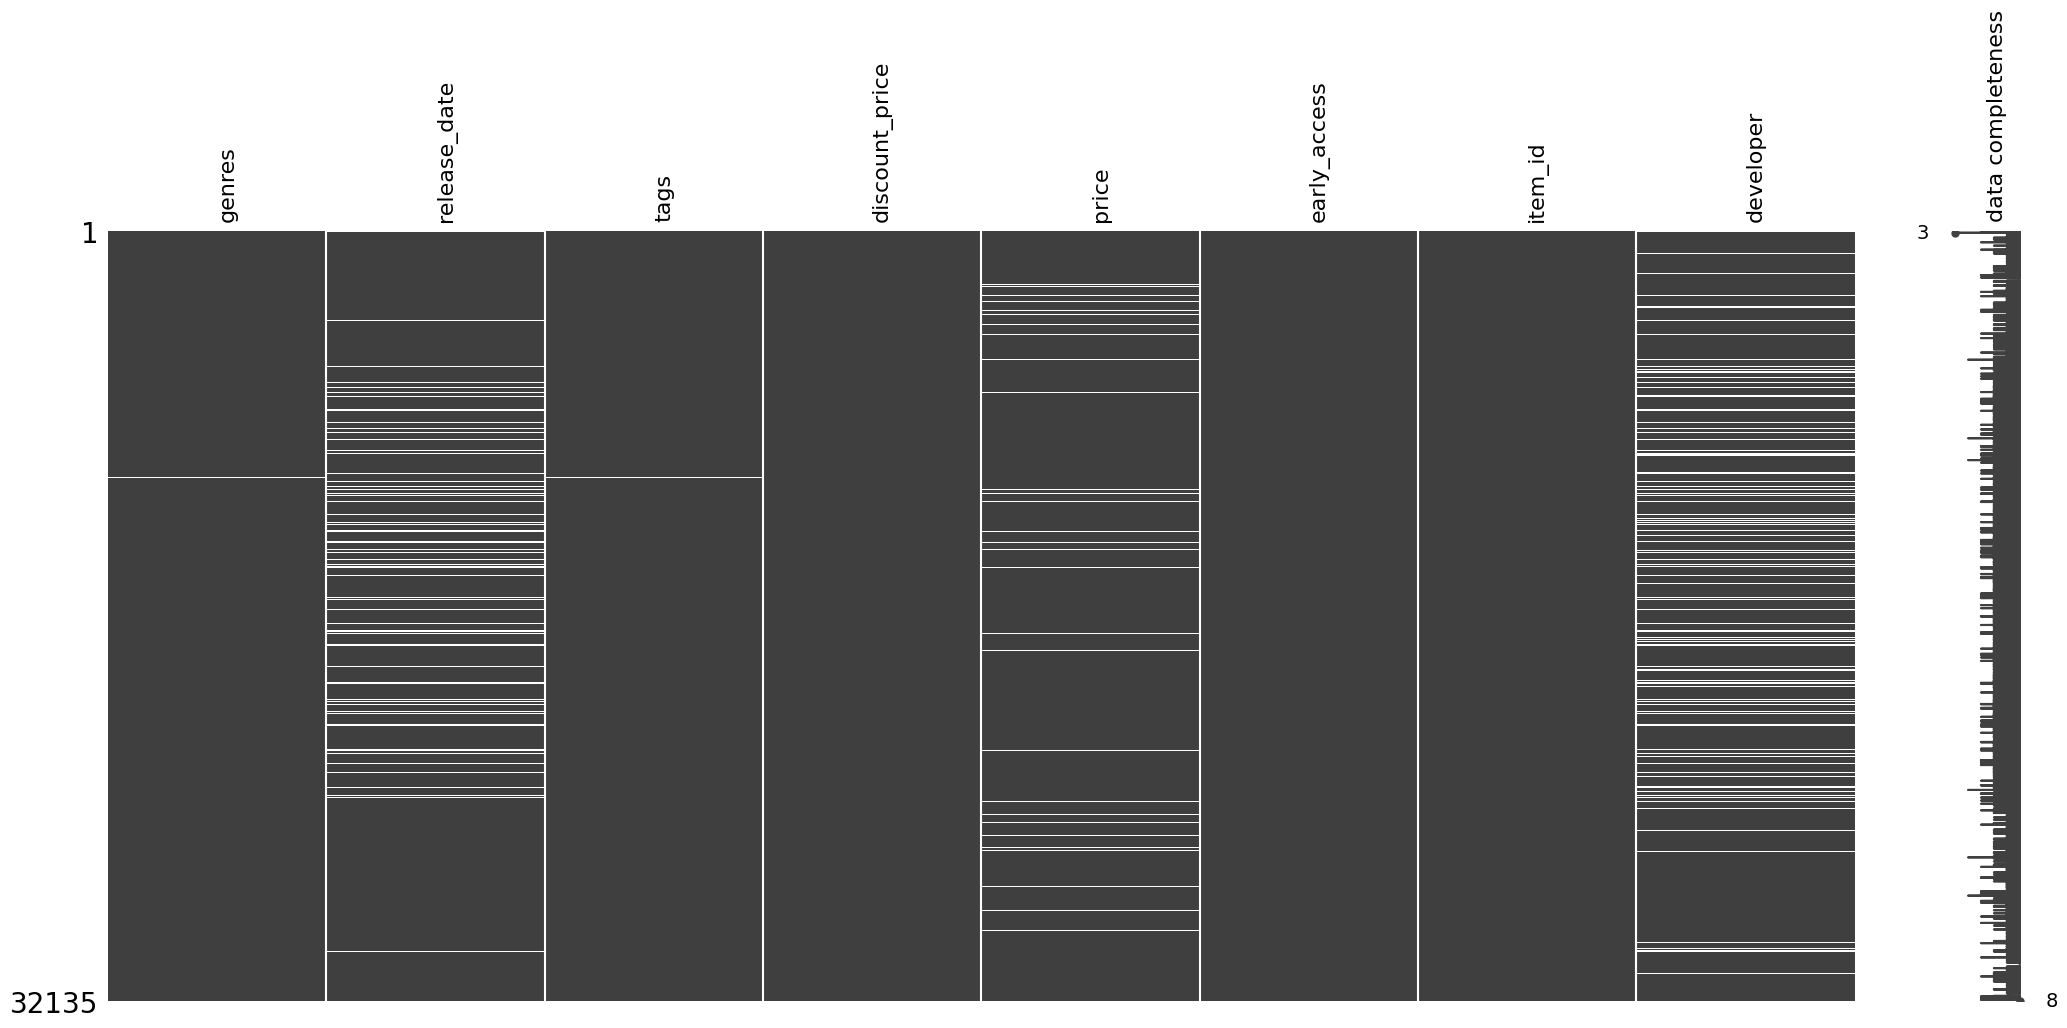

In [134]:
msno.matrix(df_games_filt1, labels=True, label_rotation=90)
plt.show()

Cambio el tipo de dato de la columna 'item_id' de objeto a int


In [135]:
def convert_item_id_to_int(df_games_filt1):
    df_games_filt1 = df_games_filt1.dropna(subset=["item_id"])
    df_games_filt1["item_id"] = df_games_filt1["item_id"].astype("int")

    return df_games_filt1

df_games_filt1 = convert_item_id_to_int(df_games_filt1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\3464710138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_filt1["item_id"] = df_games_filt1["item_id"].astype("int")


In [136]:
df_games_filt_def = df_games_filt1[['genres', 'release_date', 'discount_price',	'price', 'item_id',	'developer']]
df_games_filt_def

,genres,release_date,discount_price,price,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,4.49,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,0.00,0.00,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",2017-07-24,0.00,0.00,670290,Poolians.com
88313,"[Action, Adventure, Casual]",2017-12-07,0.83,0.99,767400,彼岸领域
88314,"[Action, Indie, Casual, Sports]",NaT,1.79,2.99,773570,NaN
...,...,...,...,...,...,...
120440,"[Casual, Indie, Simulation, Strategy]",2018-01-04,1.49,1.99,773640,"Nikita ""Ghost_RUS"""
120441,"[Casual, Indie, Strategy]",2018-01-04,4.24,4.99,733530,Sacada
120442,"[Indie, Racing, Simulation]",2018-01-04,1.39,1.99,610660,Laush Dmitriy Sergeevich
120443,"[Casual, Indie]",2017-09-02,0.00,4.99,658870,"xropi,stev3ns"


In [137]:
df_games_filt_def.head(2)

,genres,release_date,discount_price,price,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,4.49,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,0.00,0.00,643980,Secret Level SRL


- df_games_filt2

Respecto de éste subset opto por no continuar depurandolo porque considero que su contenido es idéndito o bastante similar al dataframe items (df_items) ya trabajado, por todos los análisis realizados precedentemente.

Depurados todos los data frame que entiendo utilizaré para ejecutar las funciones, procedo a guardarlos en un archivo csv.

- df_reviews

In [138]:
archivo_csv = 'df_reviews.csv'
df_reviews_unique.to_csv(archivo_csv, index=False)
df_reviews = pd.read_csv('df_reviews.csv')

In [ ]:
df_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_reviews.csv')

In [139]:
df_reviews.head(2)

,user_id,user_url
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,http://steamcommunity.com/id/js41637


- df_items
- df_reviews_split_satext

Al intentar desarrollar las funciones comprendí que resultaría más apropiado unir los data frame df_items y df_reviews_split_satext_def, el que se llamará df_reviews_split_items

In [140]:
df_reviews_split_satext_def.head(2)

,user_id,posted,item_id,recommend,sentiment_analysis
42105,killeripilleri29,NaT,252950,True,2
25335,76561198087650886,NaT,325724,True,1


In [141]:
df_reviews_split_items = pd.merge(df_items, df_reviews_split_satext_def, left_on='user_id', right_on='user_id')

In [142]:
archivo_csv = 'df_reviews_split_items.csv'
df_reviews_split_items.to_csv(archivo_csv, index=False)
df_reviews_split_items = pd.read_csv('df_reviews_split_items.csv')

In [ ]:
df_reviews_split_items = pd.read_csv('/content/df_reviews_split_items.csv')

In [144]:
df_reviews_split_items.head(2)

,user_id,items_count,steam_id,user_url,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,2
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,True,2


- df_games_split

In [145]:
archivo_csv = 'df_games_split_def.csv'
df_games_split_unique.to_csv(archivo_csv, index=False)
df_games_split_def = pd.read_csv('df_games_split_def.csv')

In [ ]:
df_games_split_def = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_reviews_split_def.csv')

In [146]:
df_games_split_def.head(2)

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,20,Team Fortress Classic,0


- df_games_filt

In [147]:
df_games_filt_def.head(2)

,genres,release_date,discount_price,price,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,4.49,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",2018-01-04,0.00,0.00,643980,Secret Level SRL


In [148]:
archivo_csv = 'df_games_filt_def.csv'
df_games_filt_def.to_csv(archivo_csv, index=False)
df_games_filt_def = pd.read_csv('df_games_filt_def.csv')

In [149]:
df_games_filt_def['release_date'] = pd.to_datetime(df_games_filt_def['release_date'])

In [ ]:
df_games_filt_def = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_games_filt_def.csv')

In [150]:
df_games_filt_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   genres          31995 non-null  object        
 1   release_date    29782 non-null  datetime64[ns]
 2   discount_price  32133 non-null  float64       
 3   price           30756 non-null  float64       
 4   item_id         32133 non-null  int64         
 5   developer       28835 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.5+ MB


# 4.- DESARROLLO DE FUNCIONES.


Puede pasar que al momento de generar las funciones se requiera realizar alguna depuración de los data sets, lo que se realizara en cada caso concreto.

A.-
- def userdata( User_id : str ): Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

Para ésta función es necesario unificar los data frame df_reviews_split_item con df_games_filt_def el que pasará a llamrse df_reviews_games.

In [151]:
df_reviews_games = df_reviews_split_items.merge(df_games_filt_def, on='item_id', how='outer')

In [152]:
df_userda = df_reviews_games[['user_id', 'item_id', 'items_count', 'price', 'discount_price', 'recommend']]

In [153]:
df_userdata = df_userda.head(35000)

In [154]:
archivo_csv = 'df_userdata.csv'
df_userdata.to_csv(archivo_csv, index=False, encoding='utf-8')
df_userdata = pd.read_csv('df_userdata.csv', encoding='utf-8')

In [155]:
def userdata(User_id: str):
    user_reviews = df_userdata[df_userdata['user_id'] == User_id]
    if user_reviews.empty:
        return f"User_id {User_id} inexistente", None, None
    user_games = df_games_filt_def[df_games_filt_def['item_id'].isin(user_reviews['item_id'])]
    money_spent = user_games['price'].sum() - user_games['discount_price'].sum()
    recommendation_percentage = (user_reviews['recommend'].mean()) * 100
    user_items = df_userdata[df_userdata['user_id'] == User_id]
    item_count = user_items['items_count'].values[0] if not user_items.empty else 0

    return {f"Usuario: {User_id}", f"Dinero gastado: ${money_spent:.2f}", f"Porcentaje de recomendación: {recommendation_percentage:.2f}%", f"Cantidad de items: {item_count}"}


In [156]:
User_id = input("Introduce el User_id: ")
user_data = userdata(User_id)
for result in user_data:
    print(result)


Cantidad de items: 123.0
Dinero gastado: $14.99
Porcentaje de recomendación: 50.00%
Usuario: EasyMcYeezy


B.-
- def countreviews( YYYY-MM-DD y YYYY-MM-DD : str ): Cantidad de usuarios que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación de los mismos en base a reviews.recommend.

In [157]:
df_countrev = df_reviews_split_items[['user_id', 'posted', 'recommend']]

In [158]:
df_countreviews = df_countrev.head(25000)

In [159]:
archivo_csv = 'df_countreviews.csv'
df_countreviews.to_csv(archivo_csv, index=False, encoding='utf-8')
df_countreviews = pd.read_csv('df_countreviews.csv', encoding='utf-8')

In [160]:
def countreviews(start_date, end_date):
    df_reviews = df_countreviews[df_countreviews["posted"].between(start_date, end_date)]
    users_with_recommendations = df_reviews.groupby("user_id")["recommend"].sum()
    users_count = len(users_with_recommendations)
    recommendations_percentage = users_with_recommendations / users_count

    return {"users": users_count, "recommendations": recommendations_percentage.mean(),}



In [161]:
start_date = "2014-10-01"
end_date = "2014-10-03"

results = countreviews(start_date, end_date)

print(results)


{'users': 60, 'recommendations': 0.017777777777777778}


C.-
- def genre( género : str ): Devuelve el puesto en el que se encuentra un género sobre el ranking de los mismos analizado bajo la columna PlayTimeForever.

Uno los data frame que voy a usar para la función en un data frame a llamarse df_genre

In [162]:
df_gen = pd.concat([df_games_split_def, df_games_filt_def[['item_id', 'genres']]], axis=1)

In [163]:
df_genre = df_gen.head(25000)

In [165]:
archivo_csv = 'df_genre.csv'
df_genre.to_csv(archivo_csv, index=False, encoding='utf-8')
df_genre = pd.read_csv('df_genre.csv', encoding='utf-8')

In [ ]:
df_genre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_genre.csv')

<ipython-input-191-36ef74edb978>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_genre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df_genre.csv')


In [166]:
df_genre.head(2)

,user_id,item_id,item_name,playtime_forever,item_id.1,genres
0,76561197970982479,10,Counter-Strike,6,761140.0,"['Action', 'Casual', 'Indie', 'Simulation', 'S..."
1,76561197970982479,20,Team Fortress Classic,0,643980.0,"['Free to Play', 'Indie', 'RPG', 'Strategy']"


In [167]:
df_genre['item_id.1'] = df_genre['item_id.1'].fillna(0)
df_genre['item_id.1'] = df_genre['item_id.1'].astype(int)

In [168]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           25000 non-null  object
 1   item_id           25000 non-null  int64 
 2   item_name         25000 non-null  object
 3   playtime_forever  25000 non-null  int64 
 4   item_id.1         25000 non-null  int32 
 5   genres            24906 non-null  object
dtypes: int32(1), int64(2), object(3)
memory usage: 1.0+ MB


In [169]:
def genre(genero: str, df_genre: pd.DataFrame):
    generos_unicos = [
        "Action", "Casual", "Indie", "Simulation", "Strategy", "Free to Play", "RPG", "Sports", 
        "Adventure", "Racing", "Early Access", "Massively Multiplayer", "Animation & Modeling", 
        "Video Production", "Utilities", "Web Publishing", "Education", "Software Training", 
        "Design & Illustration", "Audio Production", "Photo Editing", "Accounting", 'VR', 'Tutorial', 
        'Golf', 'Horror', 'Lovecraftian', 'Survival Horror', 'First-Person', 'Based On A Novel', 'FPS'
    ]
    genero_suma = {gen: 0 for gen in generos_unicos}
    df_genre = df_genre[df_genre['genres'].notna()]
    for index, row in df_genre.iterrows():
        generos = literal_eval(row['genres'])
        for g in generos:
            if g in generos_unicos:
                genero_suma[g] += row['playtime_forever']
    genero_suma_ordenado = dict(sorted(genero_suma.items(), key=lambda item: item[1], reverse=True))
    puesto = list(genero_suma_ordenado.keys()).index(genero)

    return puesto + 1


In [170]:
genero_buscado = input("Ingrese un género a consultar: ")

puesto = genre(genero_buscado, df_genre)
print(f"El género '{genero_buscado}' se encuentra en el puesto {puesto}")


El género 'Racing' se encuentra en el puesto 13


D.-
- def userforgenre( género : str ): Top 5 de usuarios con más horas de juego en el género dado, con su URL (del user) y user_id.


Para ello debo unir los data frame df_genre y df_reviews en un data set que se llamara df_genre_def

In [171]:
df_genre_def= pd.merge(df_genre, df_reviews, on="user_id")
df_genre_def = df_genre_def[['user_id', 'playtime_forever', 'genres', 'user_url']]
df_genre_def = df_genre_def.dropna(subset=['user_id', 'playtime_forever', 'genres', 'user_url'])
df_genre_def.head(2)

,user_id,playtime_forever,genres,user_url
0,76561197970982479,6,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://steamcommunity.com/profiles/76561197970...
1,76561197970982479,0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",http://steamcommunity.com/profiles/76561197970...


In [172]:
archivo_csv = 'df_genre_def.csv'
df_genre_def.to_csv(archivo_csv, index=False, encoding='utf-8')
df_genre_def = pd.read_csv('df_genre_def.csv', encoding='utf-8')

In [173]:
def userforgenre(genero: str, df_genre_def: pd.DataFrame):
    horas_por_usuario = {}
    for index, row in df_genre_def.iterrows():
        generos = literal_eval(row['genres'])
        if genero in generos:
            user_id = row['user_id']
            playtime_forever = row['playtime_forever']
            if user_id in horas_por_usuario:
                horas_por_usuario[user_id] += playtime_forever
            else:
                horas_por_usuario[user_id] = playtime_forever
    top_usuarios = sorted(horas_por_usuario.items(), key=lambda item: item[1], reverse=True)[:5]

    resultados = []
    for user_id, horas in top_usuarios:
        user_url = df_genre_def[df_genre_def['user_id'] == user_id]['user_url'].values[0]
        resultados.append({'user_id': user_id, 'horas_de_juego': horas, 'user_url': user_url})

    return resultados

In [174]:
genero_buscado = 'Racing'
top_usuarios = userforgenre(genero_buscado, df_genre_def)

# Imprimir el Top 5 de usuarios con más horas de juego en el género
for i, usuario in enumerate(top_usuarios, start=1):
    print(f"Top {i}:")
    print(f"User ID: {usuario['user_id']}")
    print(f"Horas de juego: {usuario['horas_de_juego']}")
    print(f"URL del usuario: {usuario['user_url']}")
    print()


Top 1:
User ID: thequeenpanda
Horas de juego: 263305
URL del usuario: http://steamcommunity.com/id/thequeenpanda

Top 2:
User ID: OfficialShroomsy
Horas de juego: 111914
URL del usuario: http://steamcommunity.com/id/OfficialShroomsy

Top 3:
User ID: 76561198048417105
Horas de juego: 67443
URL del usuario: http://steamcommunity.com/profiles/76561198048417105

Top 4:
User ID: 76561198060447950
Horas de juego: 62021
URL del usuario: http://steamcommunity.com/profiles/76561198060447950

Top 5:
User ID: jonasdbomb
Horas de juego: 49525
URL del usuario: http://steamcommunity.com/id/jonasdbomb



E.-
- def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora. Ejemplo de salida:

            Activision
        Año	Contenido Free
        2023	27%
        2022	25%
        xxxx	xx%

In [175]:
df_games_filt_def['release_date'] = pd.to_datetime(df_games_filt_def['release_date'])

In [176]:
df_dev = df_games_filt_def[['release_date', 'discount_price', 'price', 'item_id', 'developer']]
df_developer = df_dev.head(10000)

In [177]:
archivo_csv = 'df_developer.csv'
df_developer.to_csv(archivo_csv, index=False, encoding='utf-8')
df_developer = pd.read_csv('df_developer.csv', encoding='utf-8')

In [178]:
def developer(desarrollador):
    df_developer['release_date'] = pd.to_datetime(df_developer['release_date'])
    df_filtered = df_developer[df_developer['developer'] == desarrollador]
    df_filtered = df_filtered.dropna(subset=['release_date'])
    df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], errors='coerce')

    result_data = []

    for year in range(df_filtered['release_date'].min().year, df_filtered['release_date'].max().year + 1):
        year_items = len(df_filtered[df_filtered['release_date'].dt.year == year])
        year_free_items = len(df_filtered[(df_filtered['release_date'].dt.year == year) & (df_filtered['price'] == 0)])

        if year_items > 0:
            free_percentage = (year_free_items / year_items) * 100
        else:
            free_percentage = 0

        result_data.append({'Año': year, 'Cantidad de Ítems': year_items, 'Contenido Free': f'{free_percentage:.0f}%'})

    result_df = pd.DataFrame(result_data)

    return result_df


In [179]:
desarrollador = "Tripwire Interactive"
resultado = developer(desarrollador)
print(resultado)

    Año  Cantidad de Ítems Contenido Free
0  2009                  1             0%
1  2010                  0             0%
2  2011                  3             0%
3  2012                  2             0%
4  2013                  3             0%
5  2014                  0             0%
6  2015                  0             0%
7  2016                  1             0%


F.-
- def sentiment_analysis( año : int ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.

                    Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}



In [180]:
df_reviews_games.head(2)

,user_id,items_count,steam_id,user_url,posted,item_id,recommend,sentiment_analysis,genres,release_date,discount_price,price,developer
0,76561197970982479,277.0,7.656120e+16,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,2.0,['Action'],2009-05-14,0.0,19.99,Tripwire Interactive
1,death-hunter,121.0,7.656120e+16,http://steamcommunity.com/id/death-hunter,2015-03-30,1250,True,2.0,['Action'],2009-05-14,0.0,19.99,Tripwire Interactive


In [181]:
df_senti = df_reviews_games[['sentiment_analysis', 'release_date']]
df_sentimiento = df_senti.head(30000)

In [182]:
archivo_csv = 'df_sentimiento.csv'
df_sentimiento.to_csv(archivo_csv, index=False, encoding='utf-8')
df_sentimiento = pd.read_csv('df_sentimiento.csv', encoding='utf-8')

In [183]:
def sentiment_analysis(año: int):
    df_sentimiento['release_date'] = pd.to_datetime(df_sentimiento['release_date'], errors='coerce')
    df_reviews_filtered = df_sentimiento[
        df_sentimiento['release_date'].dt.year == año]
    sentiment_counts = df_reviews_filtered['sentiment_analysis'].value_counts()
    sentiment_dict = {
        'Negative': sentiment_counts.get(0, 0),
        'Neutral': sentiment_counts.get(1, 0),
        'Positive': sentiment_counts.get(2, 0)
    }

    return sentiment_dict

In [184]:
año_deseado = 2011
resultado = sentiment_analysis(año_deseado)

print(resultado)

{'Negative': 393, 'Neutral': 496, 'Positive': 1296}


In [185]:
año_deseado = 2010
resultado = sentiment_analysis(año_deseado)

print(resultado)

{'Negative': 60, 'Neutral': 56, 'Positive': 218}


# 5- MODELO DE RECOMENDACIÓN

Para realizar éste modelo de recomendación, concretamente el de recomendación de juego con una relación ítem-ítem utilizaré el data frame "df_genre_def", por cuanto este contiene las columnas, con los datos necesarios, para entrenar ese modelo.

I.- Dicho esto, como  primer medida cabe realizar una transformación de datos.

a. Eliminar columnas que no son necesarias. Elimino las columnas "user_id" y "playtime_forever", ya que no parecen son relevantes para la construcción del modelo de recomendación.

b. Codificar las características relevantes: Para el sistema de recomendación ítem-ítem, es importante codificar la columna "genres" de manera adecuada, por ello utilizo la técnica de codificación one-hot para convertir los géneros en características binarias, teniendo presente la particularidad de esa columna, por ser una lista de cadenas de str.

c. Manejo de datos faltantes: se debe realizar un adecuado manejo de los datos faltante en el DataFrame.

In [186]:
df_genre_def= pd.merge(df_genre, df_reviews, on="user_id")
df_genre_def = df_genre_def[['user_id', 'item_id', 'playtime_forever', 'genres', 'user_url', 'item_id.1', 'item_name']]
df_genre_def = df_genre_def.dropna(subset=['user_id', 'playtime_forever', 'genres', 'user_url'])
df_genre_def.head(2)

,user_id,item_id,playtime_forever,genres,user_url,item_id.1,item_name
0,76561197970982479,10,6,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",http://steamcommunity.com/profiles/76561197970...,761140,Counter-Strike
1,76561197970982479,20,0,"['Free to Play', 'Indie', 'RPG', 'Strategy']",http://steamcommunity.com/profiles/76561197970...,643980,Team Fortress Classic


In [187]:
from sklearn.preprocessing import MultiLabelBinarizer
df_genre_def.drop(['user_id', 'user_url', 'item_id.1'], axis=1, inplace=True)
df_genre_def.dropna(subset=['genres'], inplace=True)
df_genre_def['genres'] = df_genre_def['genres'].apply(ast.literal_eval)
mlb = MultiLabelBinarizer()
df_codificado = pd.DataFrame(mlb.fit_transform(df_genre_def['genres']), columns=mlb.classes_)
df_recomendacion = pd.concat([df_genre_def, df_codificado], axis=1)
df_recomendacion.drop(['genres'], axis=1, inplace=True)


In [188]:
display(df_recomendacion)

,item_id,playtime_forever,item_name,1980s,1990's,2D,2D Fighter,360 Video,3D Platformer,3D Vision,...,Voxel,Walking Simulator,War,Web Publishing,Werewolves,Western,World War I,World War II,Zombies,e-sports
0,10.0,6.0,Counter-Strike,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,0.0,Team Fortress Classic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,7.0,Day of Defeat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,0.0,Deathmatch Classic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50.0,0.0,Half-Life: Opposing Force,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16518,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16706,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17080,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17123,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
df_recomendacion = df_recomendacion.dropna()
df_recomendacion = df_recomendacion.head(4000)
archivo_csv = 'df_recomendacion.csv'
df_recomendacion.to_csv(archivo_csv, index=False, encoding='utf-8')
df_recomendacion = pd.read_csv('df_recomendacion.csv', encoding='utf-8')

II.- Visualización y exploración de datos.

a.- Visualización por item_name.

In [190]:
contar_items = df_recomendacion['item_name'].value_counts().reset_index()
contar_items.columns = ['item_name', 'count']

print(contar_items)

                                            item_name  count
0                                         Garry's Mod     25
1                    Counter-Strike: Global Offensive     24
2                                            Unturned     22
3                                       Left 4 Dead 2     21
4                                            Terraria     19
...                                               ...    ...
2100                                      Hammerfight      1
2101  Broken Sword 2 - the Smoking Mirror: Remastered      1
2102                          The Basement Collection      1
2103                                          Aquaria      1
2104                                       Men of War      1

[2105 rows x 2 columns]


Aquí puede visualizarse que el juego con más reseñas es Garry's Mod.

<Axes: xlabel='count', ylabel='item_name'>

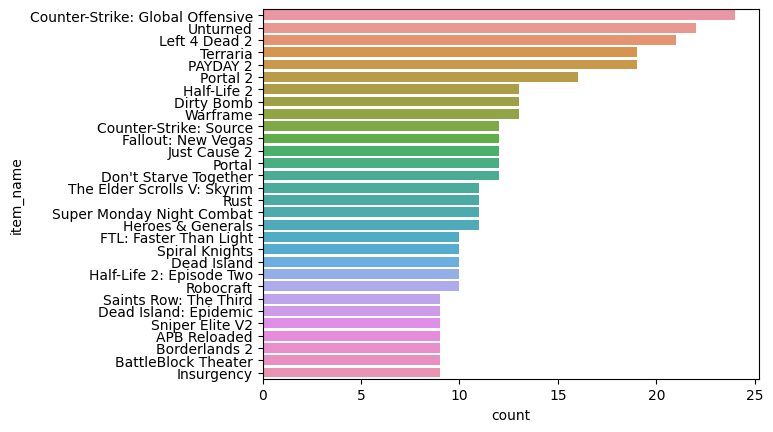

In [191]:
sns.barplot(data = contar_items.drop(0).head(30), x = 'count', y = 'item_name')

Sin embargo si visualizamos las primeras 30 filas, encabeza la lista Counter-Strike: GLobal Offensive, muy posiblemente ello se deba a que el juego mencionado arriba se encuentre después de las primeras 30 filas.

b.- Histograma de la columna 'item_id'.

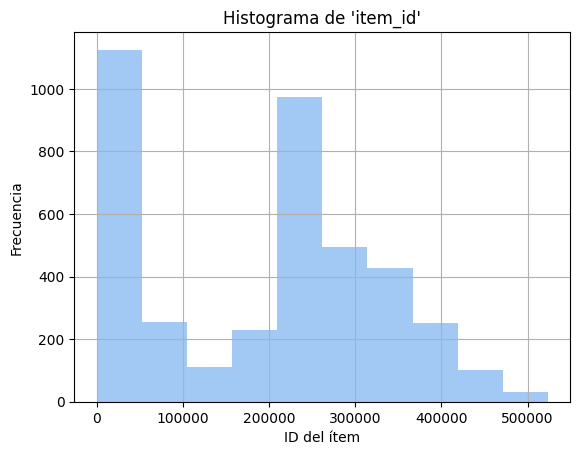

In [192]:
df_recomendacion['item_id'].hist()
plt.title("Histograma de 'item_id'")
plt.xlabel("ID del ítem")
plt.ylabel("Frecuencia")
plt.show()

En el presente histograma se puede visualizar en el eje "x" los valores únicos de la columna seleccionada, por su parte el eje "y" representa la frecuencia o la cantidad de veces que cada valor aparece en la columna.

c.- Gráfico de barra por género de video juego.

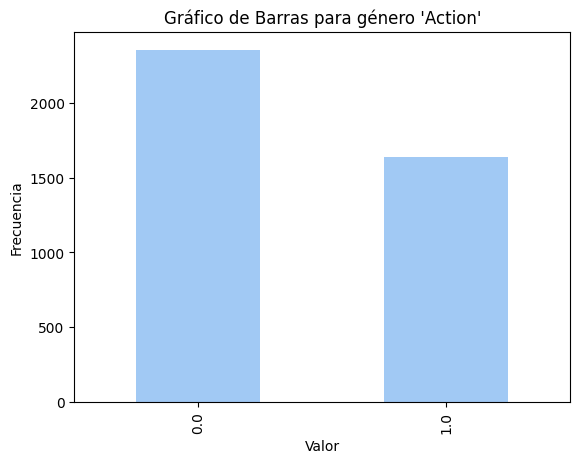

In [193]:
df_recomendacion['Action'].value_counts().plot(kind='bar')
plt.title("Gráfico de Barras para género 'Action'")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

Este gráfico de barra muestra la cantidad de juegos de acción que se encuentran dentro del data frame. Así, en el eje "x" se obserban las categorías únicas de "Action" y en el eje "y" queda plasmada la frecuencia con la que aparece el género elegido dentro de la columna, pudiendo afirmarse que éste gpenero es el que más veces aparece dentro de la columna.

d.-Gráfico de dispersión de los datos.

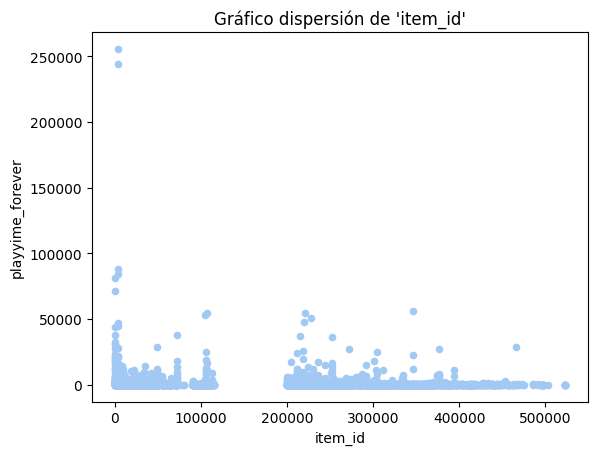

In [194]:
df_recomendacion.plot.scatter(x='item_id', y='playtime_forever')
plt.title("Gráfico dispersión de 'item_id'")
plt.xlabel("item_id")
plt.ylabel("playyime_forever")
plt.show()

En éste representación se puede ver cómo se distribuyen los valores de "playtime_forever" en función de los valores de "item_id". Cada punto en el gráfico representa un juego específico y su tiempo de juego (en el eje y) en relación con su identificador (en el eje x). 
A su vez, dell gráfico puede observarse que los items_id que van entre los 120000 y 190000 no registran tiempo de juego. Por otro lado, podemos identificar un outlier situado a la altura de las 25000 unidad de medida de tiempo de juego.

III.- Entrenamiento del modelo de recomendación de video juego.

In [195]:
df_recomendacion['item_id'].head(30)

0         10.0
1         20.0
2         30.0
3         40.0
4         50.0
5         60.0
6         70.0
7        130.0
8        300.0
9        240.0
10      3830.0
11      2630.0
12      3900.0
13     34440.0
14      3920.0
15      6400.0
16      6910.0
17      7670.0
18    409710.0
19       220.0
20       320.0
21       340.0
22       360.0
23       380.0
24       400.0
25       420.0
26      9340.0
27    228200.0
28     11450.0
29      7940.0
Name: item_id, dtype: float64

In [196]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarities = cosine_similarity(df_recomendacion.drop(['item_name', 'item_id'], axis=1))

def recomendacion_juego(id_producto, num_recomendaciones=5):
    idx = df_recomendacion[df_recomendacion['item_id'] == id_producto].index[0]
    sim_scores = list(enumerate(item_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recomendaciones+1]
    item_indices = [i[0] for i in sim_scores]
    return df_recomendacion['item_name'].iloc[item_indices]

In [197]:
recomendaciones = recomendacion_juego(10, num_recomendaciones=5)
print(recomendaciones)

2475                           Fingerbones
3003    Company of Heroes: Opposing Fronts
3324           Arma 2: Operation Arrowhead
2798    Robot Roller-Derby Disco Dodgeball
1231               Astro Lords: Oort Cloud
Name: item_name, dtype: object
